<a href="https://colab.research.google.com/github/RubenCarty/Master-Artificial-Intelligence-UNIR/blob/main/Ensemble_Models__UlloaDenis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ensemble Models**

### **Introducción**:

**Objetivo**: Predecir si una persona tiene diabetes utilizando el conjunto de datos Pima Indians Diabetes.

**Dataset**: 768 observaciones, 8 características (edad, glucosa, presión arterial, etc.) y un objetivo binario (presencia o ausencia de diabetes)

*Alumna: Ulloa de la Cruz, Denis Yanin*

**Importación de Librerías:**

In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings(action='ignore')

Manipulación y preprocesamiento de datos con pandas.
Visualización de datos usando seaborn, matplotlib y plotly para generar gráficos tanto estáticos como interactivos.
Entrenamiento y evaluación de modelos de machine learning usando herramientas de Scikit-learn para la partición de datos, estandarización de características y varias métricas de evaluación del rendimiento.
Ignorar advertencias para evitar mensajes innecesarios durante la ejecución del código.
Es probable que el código continúe con el análisis de un conjunto de datos, el entrenamiento de modelos y la evaluación de su rendimiento.

Se define una función llamada get_clf_eval que se utiliza para evaluar el rendimiento de un modelo de clasificación utilizando varias métricas comunes de evaluación.

In [ ]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)

    roc_auc = roc_auc_score(y_test, pred_proba)

    # ROC-AUC print
    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    return confusion

Calcula la matriz de confusión, que muestra las verdaderas predicciones positivas y negativas, así como los falsos positivos y negativos. La matriz de confusión es útil para ver en detalle cuántas instancias fueron clasificadas correctamente o incorrectamente.

In [ ]:
import pandas as pd
diabetes_df=pd.read_csv("/content/diabetes.csv")
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


La tabla tiene 768 filas y 9 columnas, donde cada fila representa a una persona.

Las primeras 8 columnas representan diferentes características de cada individuo (embarazos, glucosa, presión arterial, etc.).

La última columna, Outcome, indica si la persona tiene diabetes (1) o no (0).

Algunos valores, como los de insulina o grosor de la piel (SkinThickness), tienen valores de 0, lo que probablemente indica datos faltantes o que no se midieron para algunos individuos.

Este conjunto de datos es ideal para aplicar técnicas de machine learning con el objetivo de predecir si una persona tiene diabetes basándose en sus características.

In [ ]:
diabetes_df.head().T.style.set_properties(**{'background-color': 'grey',
                           'color': 'white',
                           'border-color': 'white'})

,0,1,2,3,4
Pregnancies,6.000000,1.000000,8.000000,1.000000,0.000000
Glucose,148.000000,85.000000,183.000000,89.000000,137.000000
BloodPressure,72.000000,66.000000,64.000000,66.000000,40.000000
SkinThickness,35.000000,29.000000,0.000000,23.000000,35.000000
Insulin,0.000000,0.000000,0.000000,94.000000,168.000000
BMI,33.600000,26.600000,23.300000,28.100000,43.100000
DiabetesPedigreeFunction,0.627000,0.351000,0.672000,0.167000,2.288000
Age,50.000000,31.000000,32.000000,21.000000,33.000000
Outcome,1.000000,0.000000,1.000000,0.000000,1.000000


*De este grupo de cinco personas:*

Tres tienen diabetes (Personas 0, 2, y 4), y dos no la tienen (Personas 1 y 3).

Las personas con diabetes tienden a tener valores más altos en glucosa, insulina, y en algunos casos, en BMI.

La función de pedigrí de diabetes varía considerablemente, lo que sugiere diferentes niveles de riesgo genético entre estas personas.

Este conjunto de datos es útil para entender las características que pueden influir en el riesgo de desarrollar diabetes, y es comúnmente utilizado en modelos de machine learning para predecir la diabetes basándose en estas variables.

In [ ]:
diabetes_df.rename(columns ={"DiabetesPedigreeFunction":"DPF"},inplace=True)

la columna que originalmente se llamaba "DiabetesPedigreeFunction" en el DataFrame diabetes_df ahora se llamará "DPF". Esto es útil cuando se quiere abreviar el nombre de las columnas para simplificar su uso en análisis posteriores.

In [ ]:
diabetes_df.rename(columns ={"DiabetesPedigreeFunction":"DPF"},inplace=True)

Se genera un gráfico de pastel (pie chart) con un agujero en el centro, conocido como gráfico de dona (donut chart), utilizando la librería plotly. El gráfico representa la distribución de los valores en la columna Outcome del DataFrame diabetes_df, que probablemente indica si los pacientes tienen o no diabetes.

In [ ]:
colors = ['gold', 'mediumturquoise']
labels = ['0','1']
values = diabetes_df['Outcome'].value_counts()/diabetes_df['Outcome'].shape[0]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(
    title_text="Outcome")
fig.show()

**Distribución de los resultados (Outcome):**

65.1% (sección amarilla): Corresponde a las personas que no tienen diabetes. En la etiqueta del gráfico, se marca con el número 0, que indica a los individuos cuyo resultado en la columna Outcome es 0 (no tienen diabetes).

34.9% (sección turquesa): Corresponde a las personas que tienen diabetes. Está marcado como 1, que indica a los individuos con resultado 1 en la columna Outcome (tienen diabetes).



---



El código generará una tabla donde los valores mínimos de cada columna estarán resaltados con texto negro y un fondo gris.
Esta tabla será interactiva y visualmente clara para ver rápidamente los valores mínimos de cada estadística en el resumen generado por describe().

In [ ]:
import numpy as np
import pandas as pd
def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')

diabetes_df.describe().style.apply(highlight_min, props='color:Black;background-color:Grey', axis=0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


En el conjunto de datos hay un amplio rango de valores, y parece que algunas características tienen valores de 0, lo que probablemente indica datos faltantes (por ejemplo, en Glucose, BloodPressure, SkinThickness, Insulin, y BMI).

La edad promedio es de 33 años, con un rango de edades entre 21 y 81.

El 34.9% de los participantes en este conjunto de datos tienen diabetes, mientras que el resto no.

Se observa una alta variabilidad en los valores de insulina y glucosa, lo que es característico de personas con diferentes niveles de control sobre la diabetes o su riesgo de desarrollarla.

In [ ]:
feature_names = [cname for cname in diabetes_df.loc[:,:'Age'].columns]


 Se utiliza las bibliotecas Matplotlib y Seaborn para visualizar la distribución de las características del conjunto de datos diabetes_df, distinguiendo los resultados (Outcome) de las personas con diabetes y sin diabetes

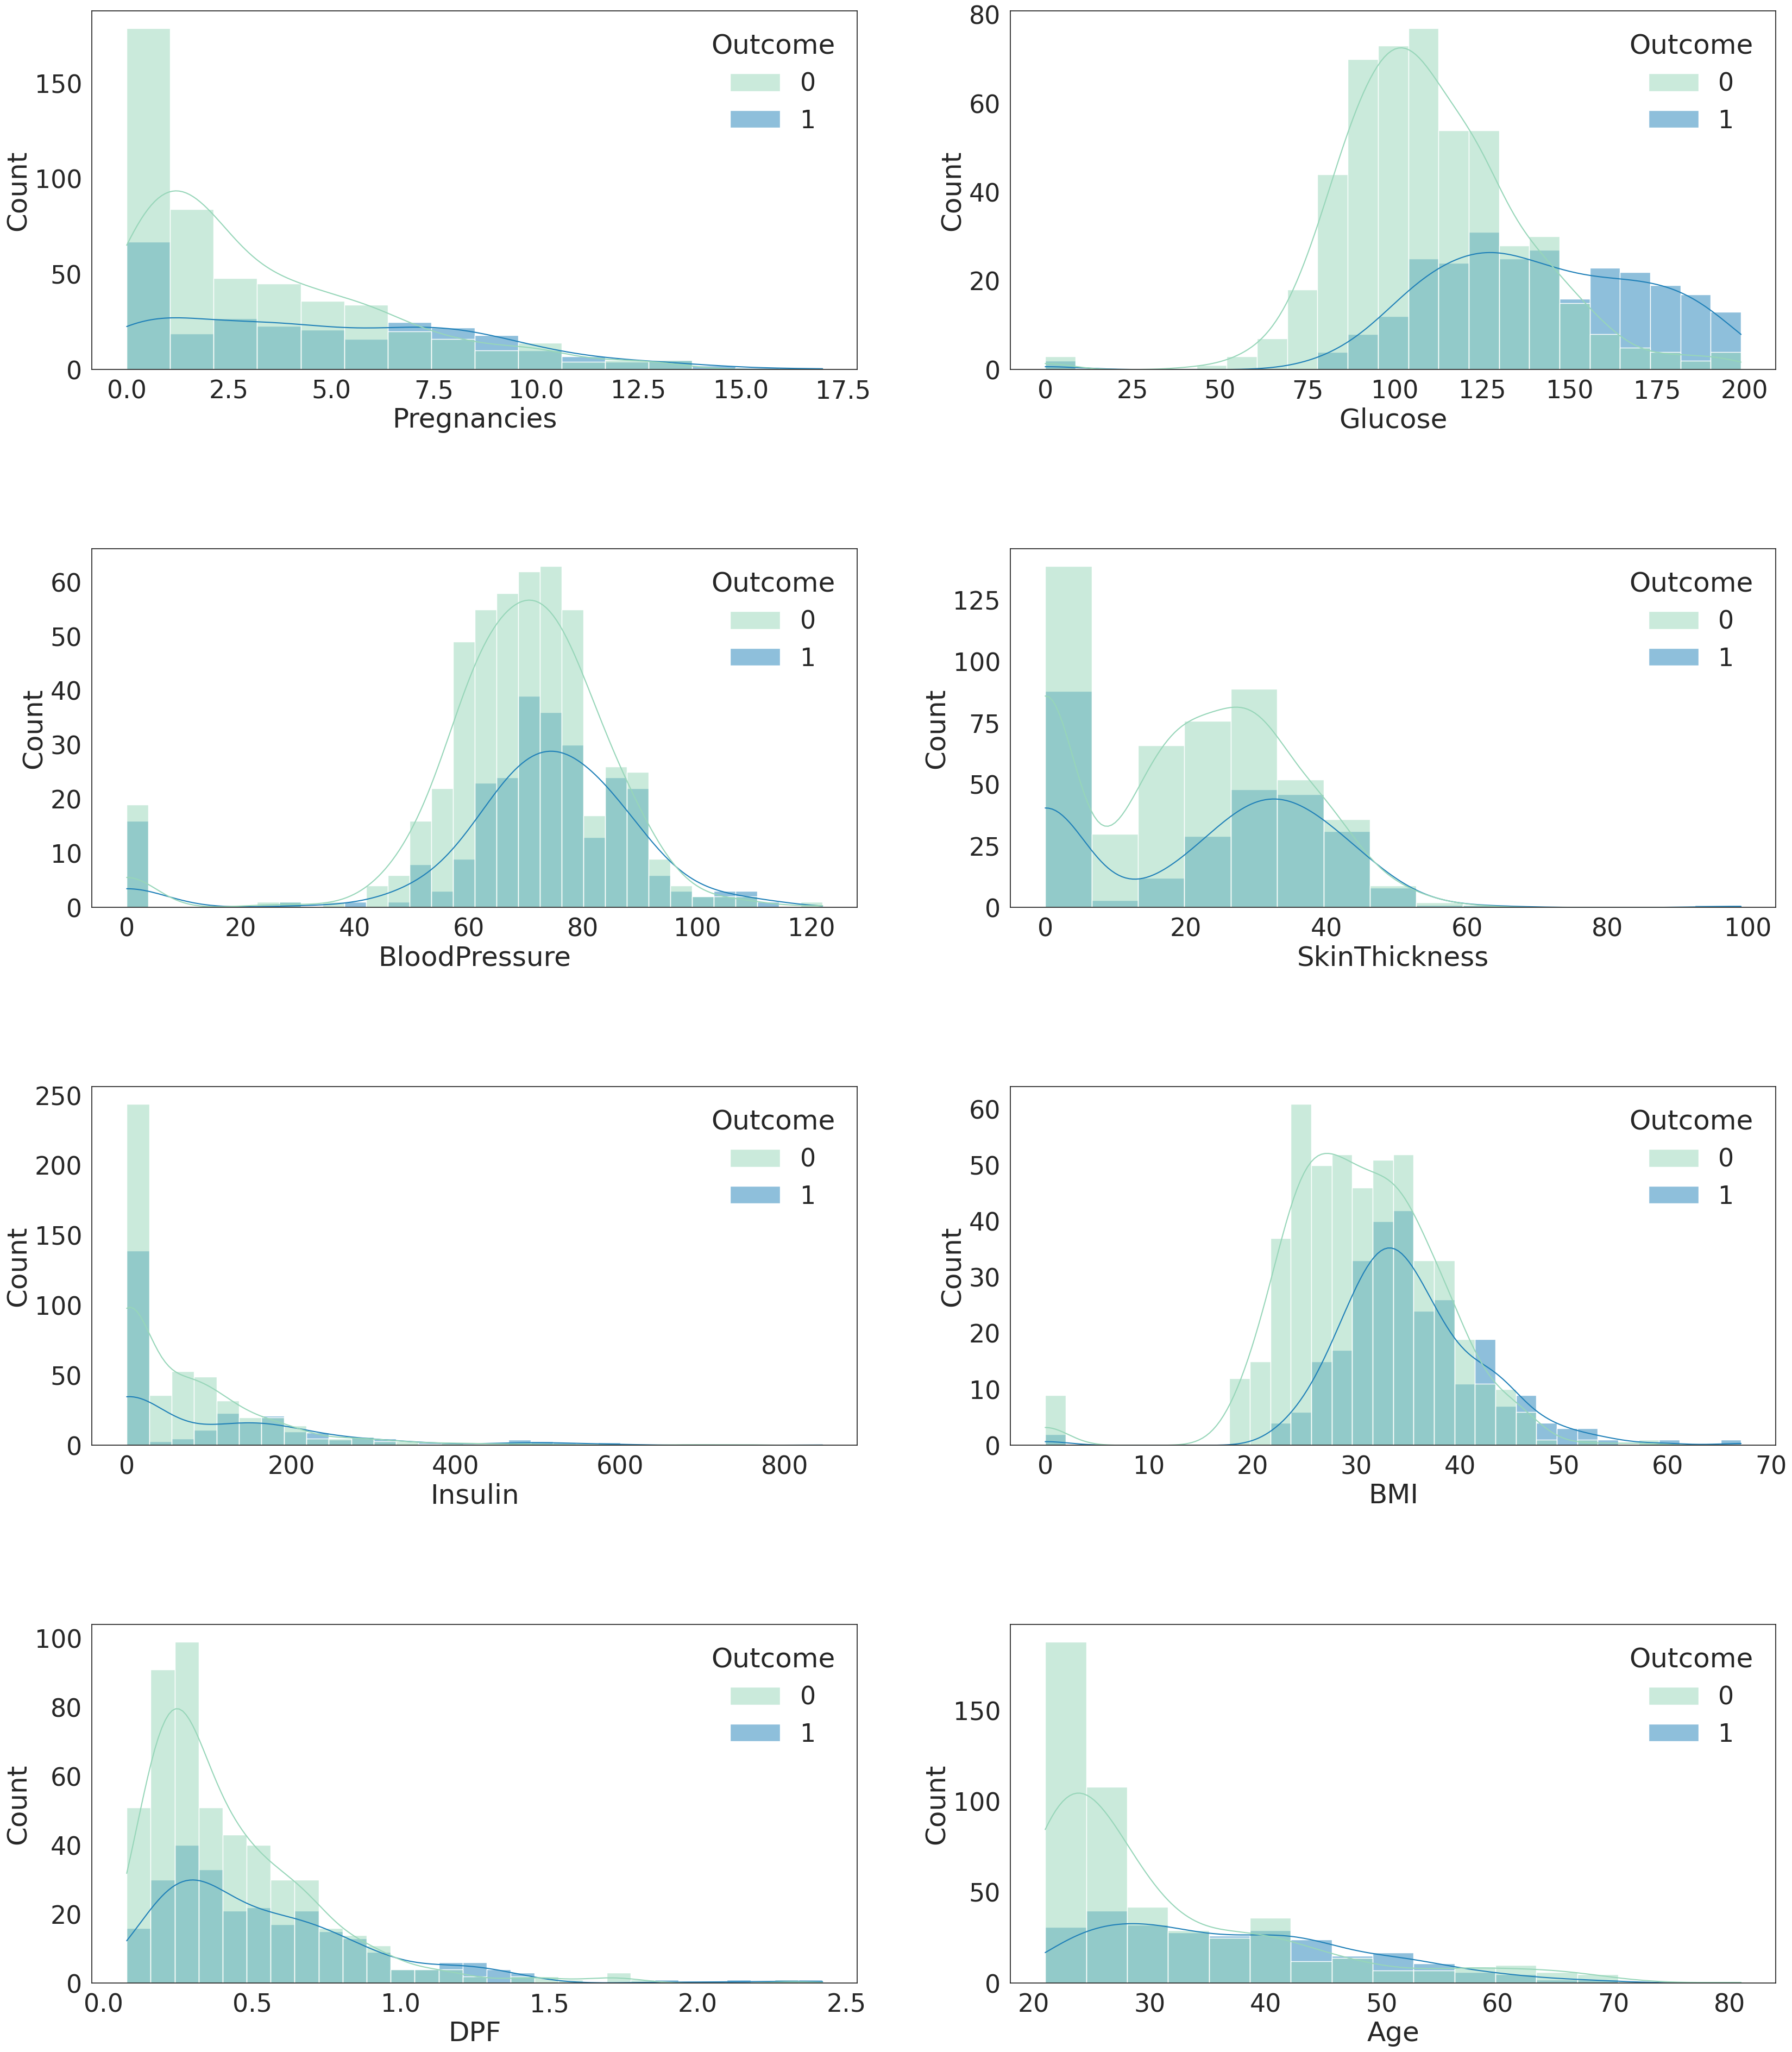

In [ ]:
rcParams['figure.figsize'] = 40,60
sns.set(font_scale = 3)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data=diabetes_df, x=name, hue="Outcome",kde=True,palette="YlGnBu")
    i = i + 1

**Gráfico 1: Pregnancies (Embarazos)**
Sin diabetes (Outcome 0): La mayoría de las personas sin diabetes tienen entre 0 y 3 embarazos, con muy pocas que tienen más de 10.
Con diabetes (Outcome 1): Las personas con diabetes tienden a tener un mayor número de embarazos. La distribución es más uniforme, pero también muestra un pico entre 2 y 6 embarazos.
Conclusión: Parece haber una correlación entre el número de embarazos y la probabilidad de tener diabetes. Un mayor número de embarazos podría estar asociado con una mayor probabilidad de desarrollar diabetes.

**Gráfico 2: Glucose (Glucosa)**
Sin diabetes (Outcome 0): La mayoría de las personas sin diabetes tienen niveles de glucosa entre 80 y 120 mg/dL.
Con diabetes (Outcome 1): Las personas con diabetes tienen niveles de glucosa más altos, la mayoría está entre 120 y 180 mg/dL, con algunos casos superando los 180 mg/dL.
Conclusión: Los niveles más altos de glucosa están claramente asociados con una mayor probabilidad de tener diabetes.

**Gráfico 3: BloodPressure (Presión Arterial Diastólica)**
Sin diabetes (Outcome 0): Las personas sin diabetes tienen una presión arterial bastante normal, la mayoría de los valores están entre 60 y 80 mm Hg.
Con diabetes (Outcome 1): La distribución para personas con diabetes es similar, aunque parece haber más variación y algunos casos de presión arterial más baja.
Conclusión: La presión arterial no parece ser un factor determinante tan claro como la glucosa, aunque las personas con diabetes muestran más variabilidad.

**Gráfico 4: SkinThickness (Grosor del pliegue cutáneo)**
Sin diabetes (Outcome 0): La mayoría de las personas sin diabetes tienen un grosor del pliegue cutáneo de alrededor de 20 a 40 mm, aunque muchos casos tienen un grosor de 0 mm, lo que puede indicar datos faltantes.
Con diabetes (Outcome 1): Las personas con diabetes tienen una distribución similar, pero hay un ligero sesgo hacia valores más altos.
Conclusión: La relación entre el grosor de la piel y la diabetes no es tan evidente, pero puede haber una ligera correlación con valores más altos en personas con diabetes.

**Gráfico 5: Insulin (Insulina)**
Sin diabetes (Outcome 0): Muchas personas sin diabetes tienen valores de insulina cercanos a 0, lo que podría indicar datos faltantes o personas con insulina baja. Los valores varían considerablemente entre 0 y 200.
Con diabetes (Outcome 1): Las personas con diabetes también tienen valores bajos, pero hay una mayor cantidad con niveles de insulina más altos (hasta más de 600).
Conclusión: Los niveles altos de insulina parecen estar asociados con una mayor probabilidad de tener diabetes.

**Gráfico 6: BMI (Índice de Masa Corporal)**
Sin diabetes (Outcome 0): Las personas sin diabetes tienen un BMI distribuido entre 20 y 35, con un pico alrededor de 30.
Con diabetes (Outcome 1): Las personas con diabetes tienden a tener un BMI más alto, con la mayoría entre 30 y 40.
Conclusión: Un índice de masa corporal más alto parece estar asociado con una mayor probabilidad de desarrollar diabetes.

**Gráfico 7: DPF (Diabetes Pedigree Function)**
Sin diabetes (Outcome 0): La función de pedigrí para personas sin diabetes se distribuye mayormente por debajo de 0.5, lo que indica una baja probabilidad genética.
Con diabetes (Outcome 1): Las personas con diabetes tienen una mayor proporción de valores por encima de 0.5, lo que indica una mayor probabilidad genética de diabetes.
Conclusión: Las personas con antecedentes familiares de diabetes tienen más probabilidades de desarrollar la enfermedad.

**Gráfico 8: Age (Edad)**
Sin diabetes (Outcome 0): La mayoría de las personas sin diabetes tienen entre 20 y 40 años.
Con diabetes (Outcome 1): Las personas con diabetes tienden a ser mayores, con una mayor proporción de personas entre 40 y 60 años.
Conclusión: La edad es un factor importante en el desarrollo de diabetes, con personas mayores siendo más propensas a la enfermedad.

In [ ]:
zero_features = ['Pregnancies','Glucose','BloodPressure','SkinThickness',"Insulin",'BMI']
total_count = diabetes_df['Glucose'].count()

for feature in zero_features:
    zero_count = diabetes_df[diabetes_df[feature]==0][feature].count()
    print('{0} 0 number of cases {1}, percent is {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Pregnancies 0 number of cases 111, percent is 14.45 %
Glucose 0 number of cases 5, percent is 0.65 %
BloodPressure 0 number of cases 35, percent is 4.56 %
SkinThickness 0 number of cases 227, percent is 29.56 %
Insulin 0 number of cases 374, percent is 48.70 %
BMI 0 number of cases 11, percent is 1.43 %


**Existen valores faltantes o incorrectos:**
Las características como Glucose, BloodPressure, SkinThickness, Insulin, y BMI tienen un número significativo de valores de 0, lo que probablemente representa valores faltantes o errores de medición. Estos datos deberían manejarse adecuadamente antes de realizar análisis o modelado, mediante técnicas como la imputación de valores o la eliminación de filas con datos faltantes.
Pregnancies: Aunque tiene un número notable de casos con valor 0, esto es esperable y no necesariamente un problema de calidad de datos, ya que muchas personas pueden no haber tenido embarazos.



---



Se utiliza este código para imputar los valores faltantes (representados por ceros) en el DataFrame diabetes_df para las columnas especificadas en zero_features.

In [ ]:
diabetes_mean = diabetes_df[zero_features].mean()
diabetes_df[zero_features]=diabetes_df[zero_features].replace(0, diabetes_mean)

Este código está separando el conjunto de datos en características (X) y la variable objetivo (y).

In [ ]:
X = diabetes_df.iloc[:,:-1]
y = diabetes_df.iloc[:,-1]



---



# **SCALING**

Es una técnica que ajusta los valores de las características para que estén en un rango específico o sigan una cierta distribución. Es particularmente útil en modelos de machine learning, ya que muchas técnicas (como los métodos basados en distancia) se ven afectadas por la escala de las variables.

En este caso, aunque los valores cero en el conjunto de datos han sido reemplazados por los valores medios (lo que mitiga los problemas de datos faltantes), algunas características aún tienen distribuciones asimétricas. Es decir, pueden tener una "cola larga" o estar sesgadas hacia un lado, lo que puede causar problemas en el rendimiento del modelo. Por ejemplo:

Una característica con muchos valores bajos y unos pocos valores extremadamente altos tendrá una distribución asimétrica.

**QuantileTransformer:**

Este código aplica el QuantileTransformer para realizar un escalado no lineal en las características de entrada X. El objetivo es transformar las características de manera que sigan una distribución normal.

In [ ]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')
X_scaled = scaler.fit_transform(X)

**División de datos en conjunto de entrenamiento y prueba:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**Función para resaltar valores mínimos en un DataFrame:**

In [ ]:
def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')

X_train.describe().style.apply(highlight_min, props='color:Black;background-color:Grey', axis=0)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,4.315407,121.709154,72.144653,26.341978,118.600098,32.315027,0.468618,32.921875
std,2.916151,30.080570,12.113756,9.158041,94.570101,6.878494,0.339325,11.507539
min,1.000000,44.000000,24.000000,8.000000,14.000000,18.200000,0.078000,21.000000
25%,2.000000,100.000000,64.000000,20.536458,79.799479,27.275000,0.240000,24.000000
50%,3.845052,118.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000
75%,6.000000,138.250000,80.000000,32.000000,127.500000,36.325000,0.612250,40.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000


**Interpretación de los valores mínimos resaltados:**

**Pregnancies (Embarazos)**: El valor mínimo es 1, lo que indica que no hay valores de 0 en el conjunto de datos de entrenamiento después de la limpieza de datos.

**Glucose (Glucosa):** El valor mínimo es 44, que es un nivel de glucosa bastante bajo. Este valor puede ser clínicamente significativo, ya que niveles tan bajos de glucosa podrían indicar hipoglucemia.

**BloodPressure (Presión arterial diastólica**): El valor mínimo es 24, lo cual es un valor anormalmente bajo para la presión arterial, probablemente indicando datos faltantes o errores de medición.

**SkinThickness (Grosor del pliegue cutáneo)**: El valor mínimo es 8, lo que parece razonable. No se observan valores de 0 en esta característica, lo que indica que los valores de 0 se han imputado o corregido.

**Insulin (Insulina):** El valor mínimo es 14, lo que indica que no hay valores de 0 en el nivel de insulina.

**BMI:** El valor mínimo es 18.2, lo que indica un índice de masa corporal bajo pero dentro de un rango razonable.

**DPF (Diabetes Pedigree Function)**: El valor mínimo es 0.078, lo que indica una baja probabilidad de predisposición genética a la diabetes para algunos pacientes.

**Age (Edad):** El valor mínimo es 21 años, lo que parece razonable para un conjunto de datos sobre diabetes.

Se utiliza Matplotlib y Seaborn para generar una serie de gráficos de distribución (histogramas) de varias características del conjunto de datos diabetes_df, diferenciadas por la variable objetivo Outcome, que indica si una persona tiene o no diabetes.

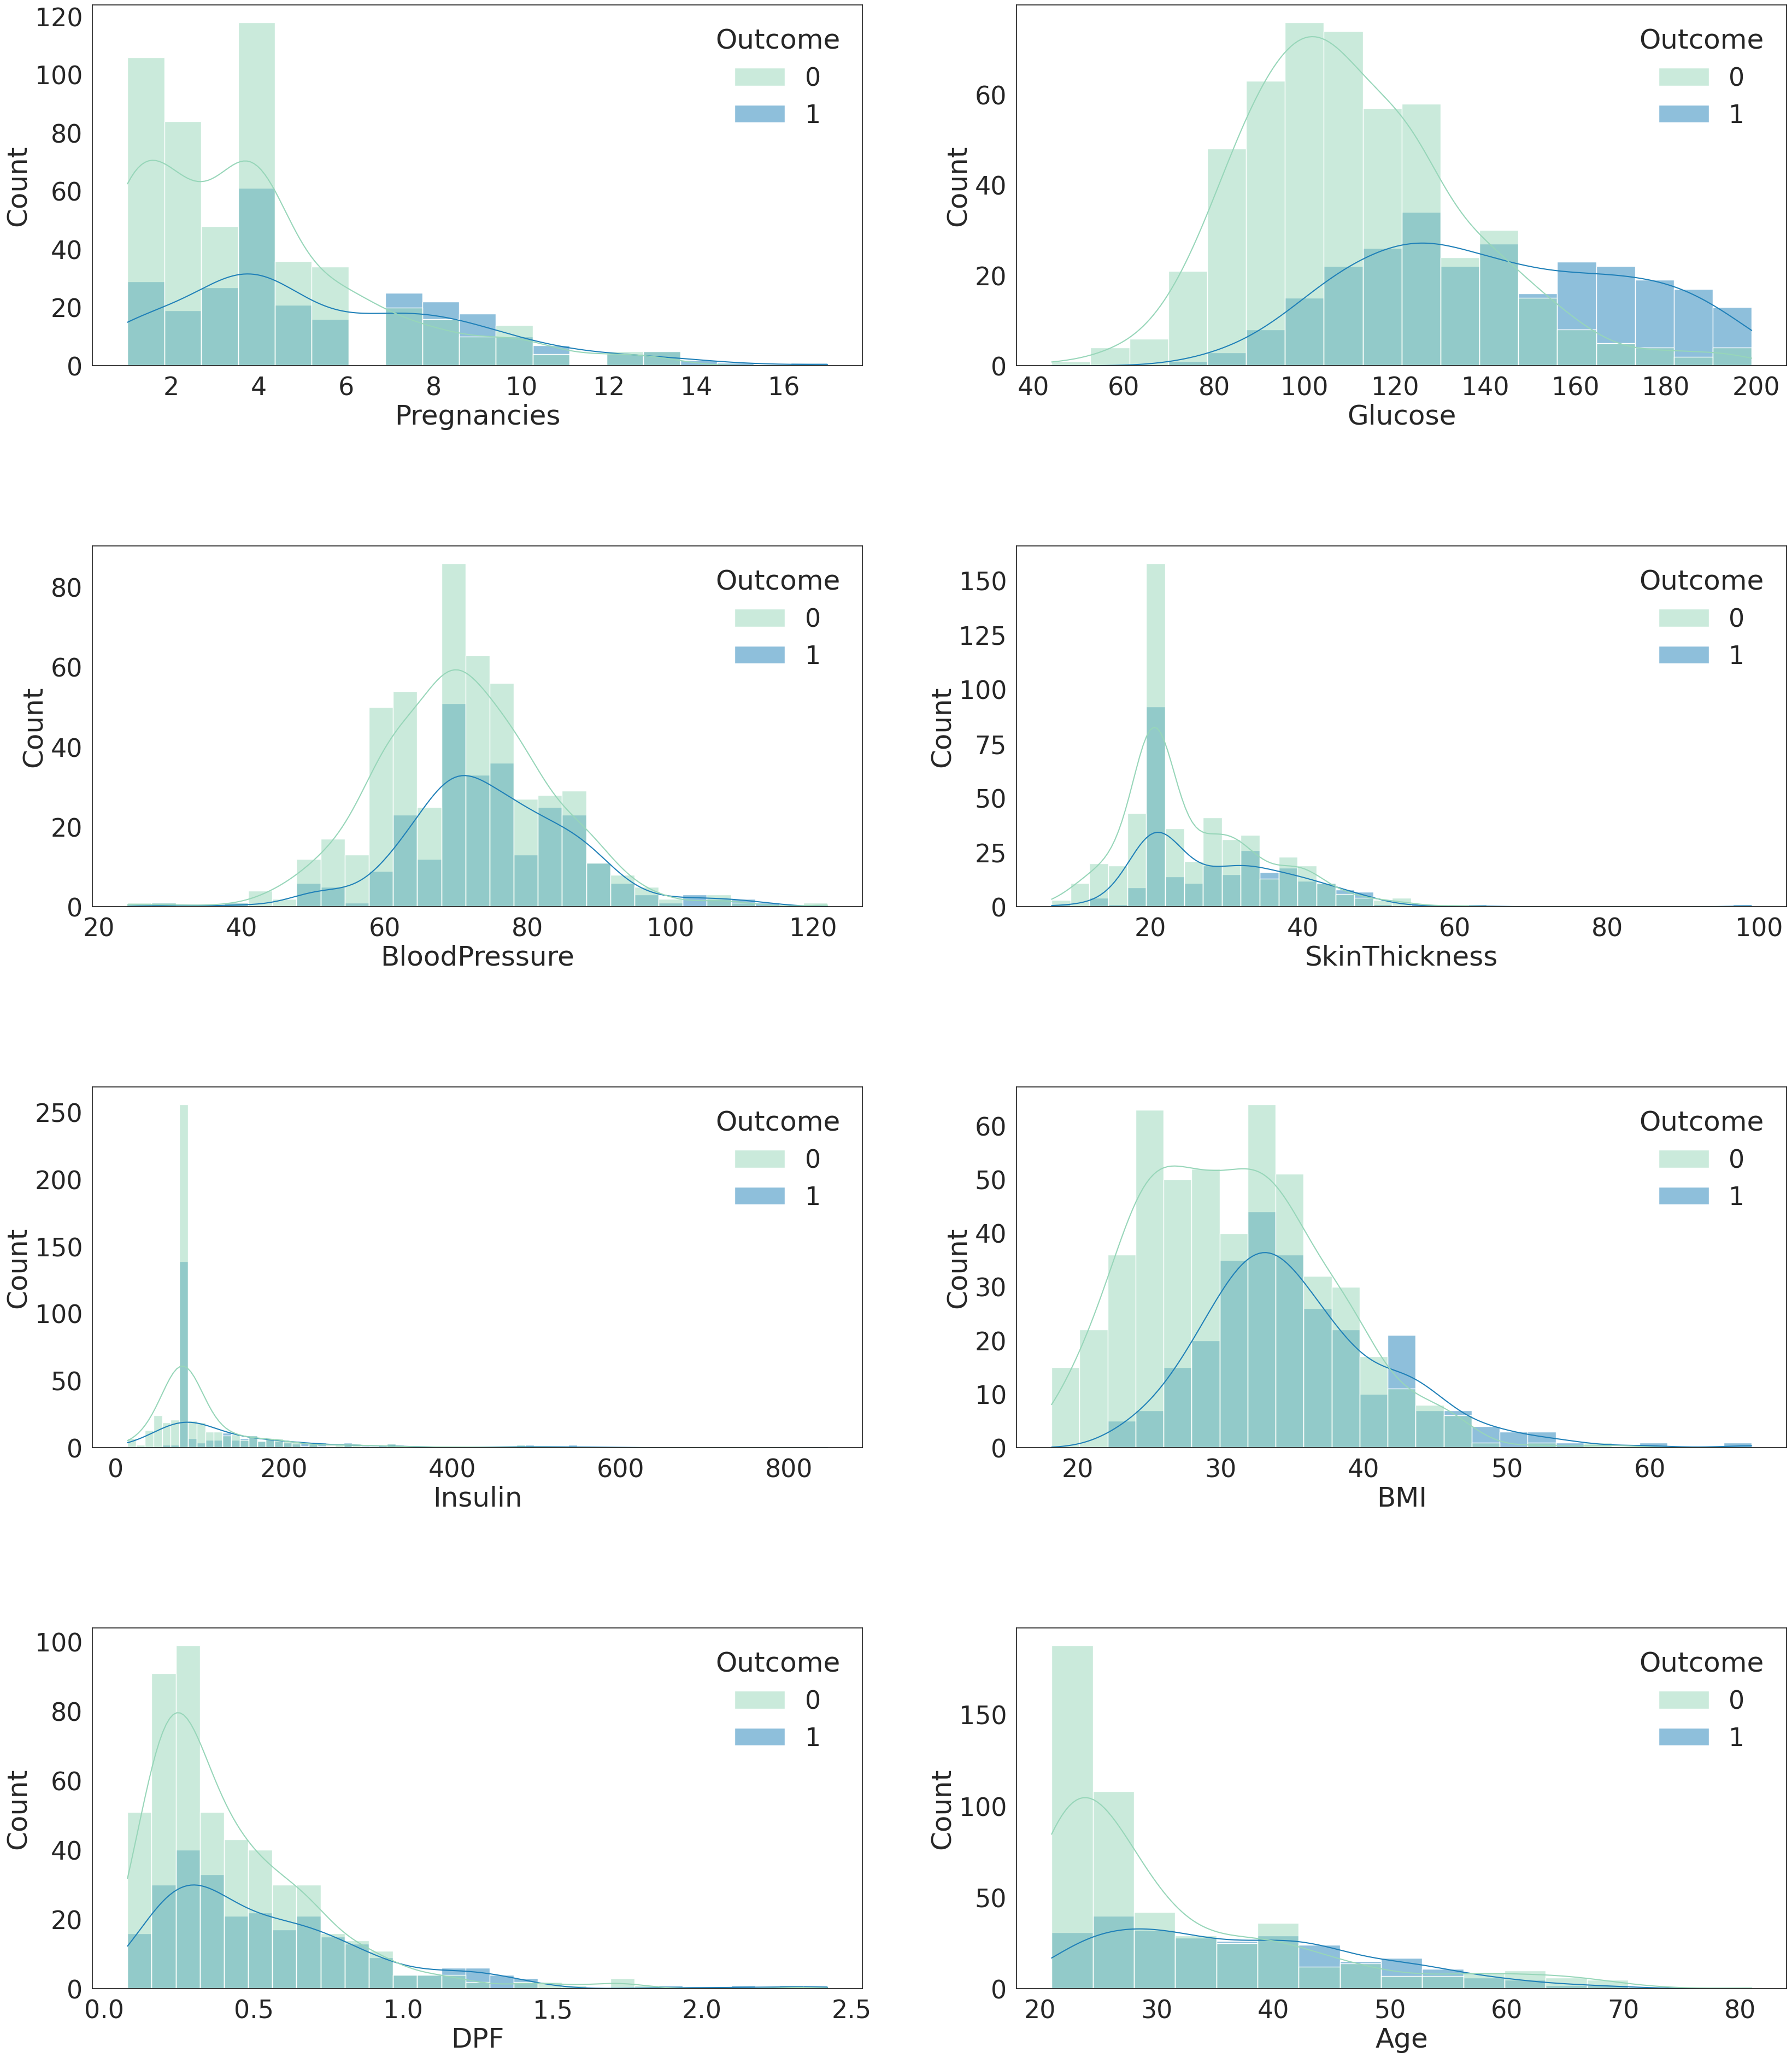

In [ ]:
rcParams['figure.figsize'] = 40,60
sns.set(font_scale = 3)
sns.set_style("white")
sns.set_palette("bright")
plt.subplots_adjust(hspace=0.5)
i = 1;
for name in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data=diabetes_df, x=name, hue="Outcome",kde=True,palette="YlGnBu")
    i = i + 1

**1. Pregnancies (Embarazos)**
Personas sin diabetes (Outcome 0): La mayoría de las personas sin diabetes tiene entre 0 y 3 embarazos.
Personas con diabetes (Outcome 1): Las personas con diabetes tienden a tener más embarazos en promedio, con picos entre 4 y 8 embarazos.
Conclusión: Parece haber una correlación entre un mayor número de embarazos y una mayor probabilidad de desarrollar diabetes.

**2. Glucose (Glucosa)**
Personas sin diabetes (Outcome 0): La mayoría de las personas sin diabetes tienen niveles de glucosa entre 90 y 120 mg/dL.
Personas con diabetes (Outcome 1): Las personas con diabetes tienden a tener niveles de glucosa más altos, con un pico en el rango de 120 a 160 mg/dL.
Conclusión: Los niveles altos de glucosa están claramente asociados con una mayor probabilidad de tener diabetes.

**3. BloodPressure (Presión Arterial Diastólica)**
Personas sin diabetes (Outcome 0): La presión arterial se distribuye principalmente entre 60 y 80 mm Hg.
Personas con diabetes (Outcome 1): Aunque la distribución es similar a las personas sin diabetes, hay más variabilidad en los valores, lo que sugiere que la presión arterial podría estar menos controlada en personas con diabetes.
Conclusión: La presión arterial no parece ser un indicador tan fuerte de diabetes como la glucosa.

**4. SkinThickness (Grosor del Pliegue Cutáneo)**
Personas sin diabetes (Outcome 0): Los valores están mayormente en el rango de 15 a 35 mm.
Personas con diabetes (Outcome 1): La distribución es similar, pero con una ligera tendencia a valores más altos en personas con diabetes.
Conclusión: No hay una diferencia clara entre los dos grupos en cuanto al grosor de la piel, aunque algunos valores más altos aparecen en personas con diabetes.

**5. Insulin (Insulina)**
Personas sin diabetes (Outcome 0): Hay un pico significativo de personas con niveles de insulina cercanos a 0, lo que podría indicar valores faltantes o no medidos.
Personas con diabetes (Outcome 1): También hay un pico de insulina cercana a 0, pero en los casos donde la insulina es mayor, las personas con diabetes tienen niveles más altos de insulina.
Conclusión: Los niveles de insulina altos parecen estar más asociados con la diabetes, aunque muchos valores cercanos a 0 podrían estar influyendo en los resultados.

**6. BMI (Índice de Masa Corporal)**
Personas sin diabetes (Outcome 0): El BMI para personas sin diabetes se concentra en el rango de 20 a 35.
Personas con diabetes (Outcome 1): Las personas con diabetes tienden a tener un BMI más alto, con un pico alrededor de 35 a 40.
Conclusión: Un BMI más alto parece estar correlacionado con una mayor probabilidad de tener diabetes.

**7. DPF (Diabetes Pedigree Function)**
Personas sin diabetes (Outcome 0): La mayoría de las personas sin diabetes tienen un valor de DPF bajo, principalmente por debajo de 0.5.
Personas con diabetes (Outcome 1): Las personas con diabetes tienden a tener un valor de DPF más alto, lo que indica una mayor probabilidad genética de desarrollar diabetes.
Conclusión: El historial familiar de diabetes, medido a través de DPF, parece ser un factor importante en el desarrollo de la diabetes.

**8. Age (Edad)**
Personas sin diabetes (Outcome 0): La mayoría de las personas sin diabetes tienen entre 20 y 40 años.
Personas con diabetes (Outcome 1): Las personas con diabetes tienden a ser mayores, con una distribución más amplia hacia edades mayores (40 a 60 años).
Conclusión: La edad es un factor importante, ya que las personas mayores parecen tener un mayor riesgo de desarrollar diabetes.




# **Comprobando la correlación entre las características**
Se verifica las correlaciones entre cada variable.

**Cálculo de la matriz de correlación:**

Text(0.5, 1.0, 'Correlation Plot')

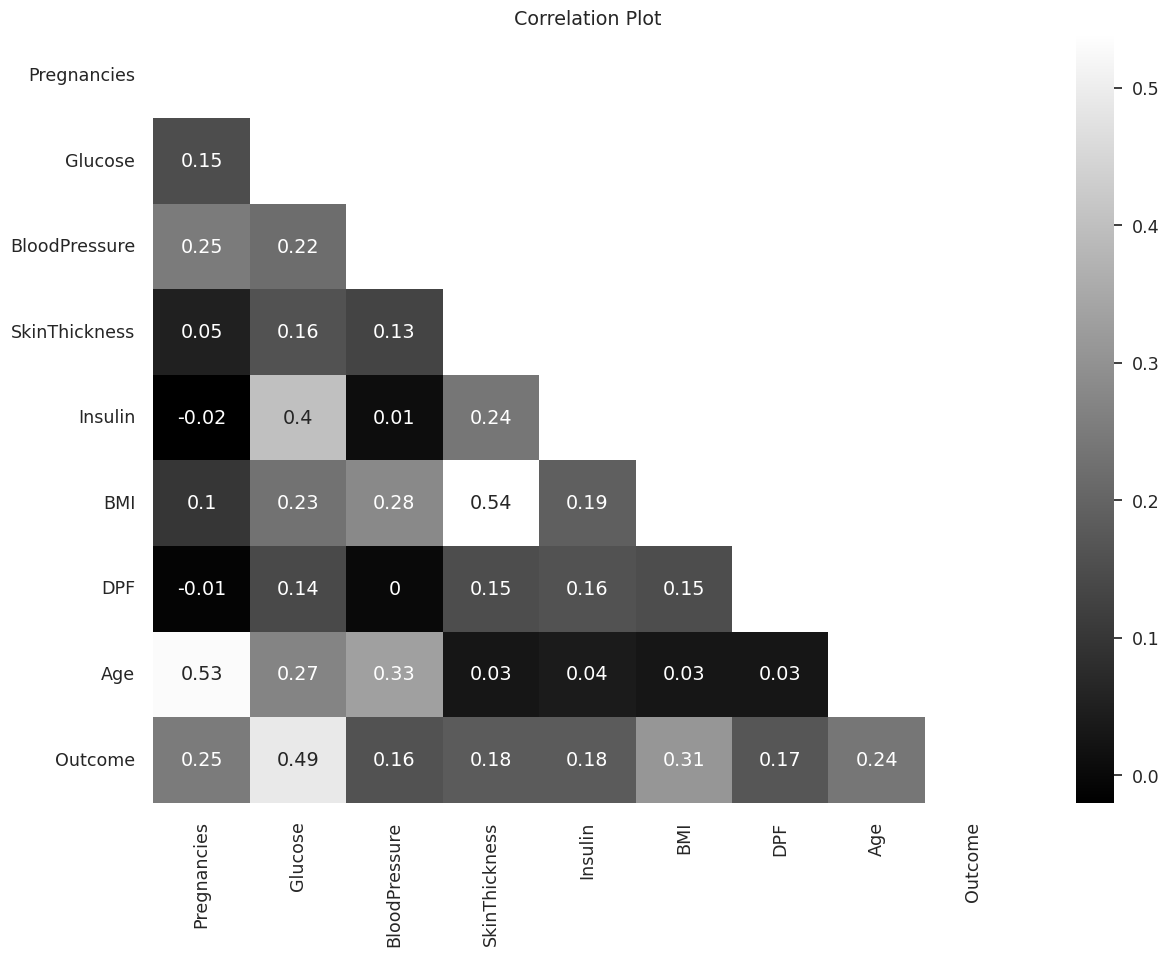

In [ ]:
corr=diabetes_df.corr().round(2)

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))
sns.set_palette("bright")
sns.set_style("white")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,annot=True,cmap='gist_yarg_r',mask=mask,cbar=True)
plt.title('Correlation Plot')

El gráfico de correlación proporciona una visión clara de cómo están relacionadas las características en el conjunto de datos de diabetes. En particular, Glucose, BMI, y Age muestran correlaciones moderadas con Outcome, lo que sugiere que estas son características importantes para predecir la diabetes. Las otras características, como BloodPressure y Insulin, también tienen algunas correlaciones, pero son menos fuertes en comparación. Este análisis es útil para identificar qué variables pueden tener más peso en el desarrollo de un modelo predictivo para la diabetes.

 Se visualiza las relaciones entre múltiples características del conjunto de datos, permitiendo observar tanto distribuciones univariadas (diagonales) como relaciones bivariadas (gráficos de dispersión) entre pares de variables.

<Figure size 1000x800 with 0 Axes>

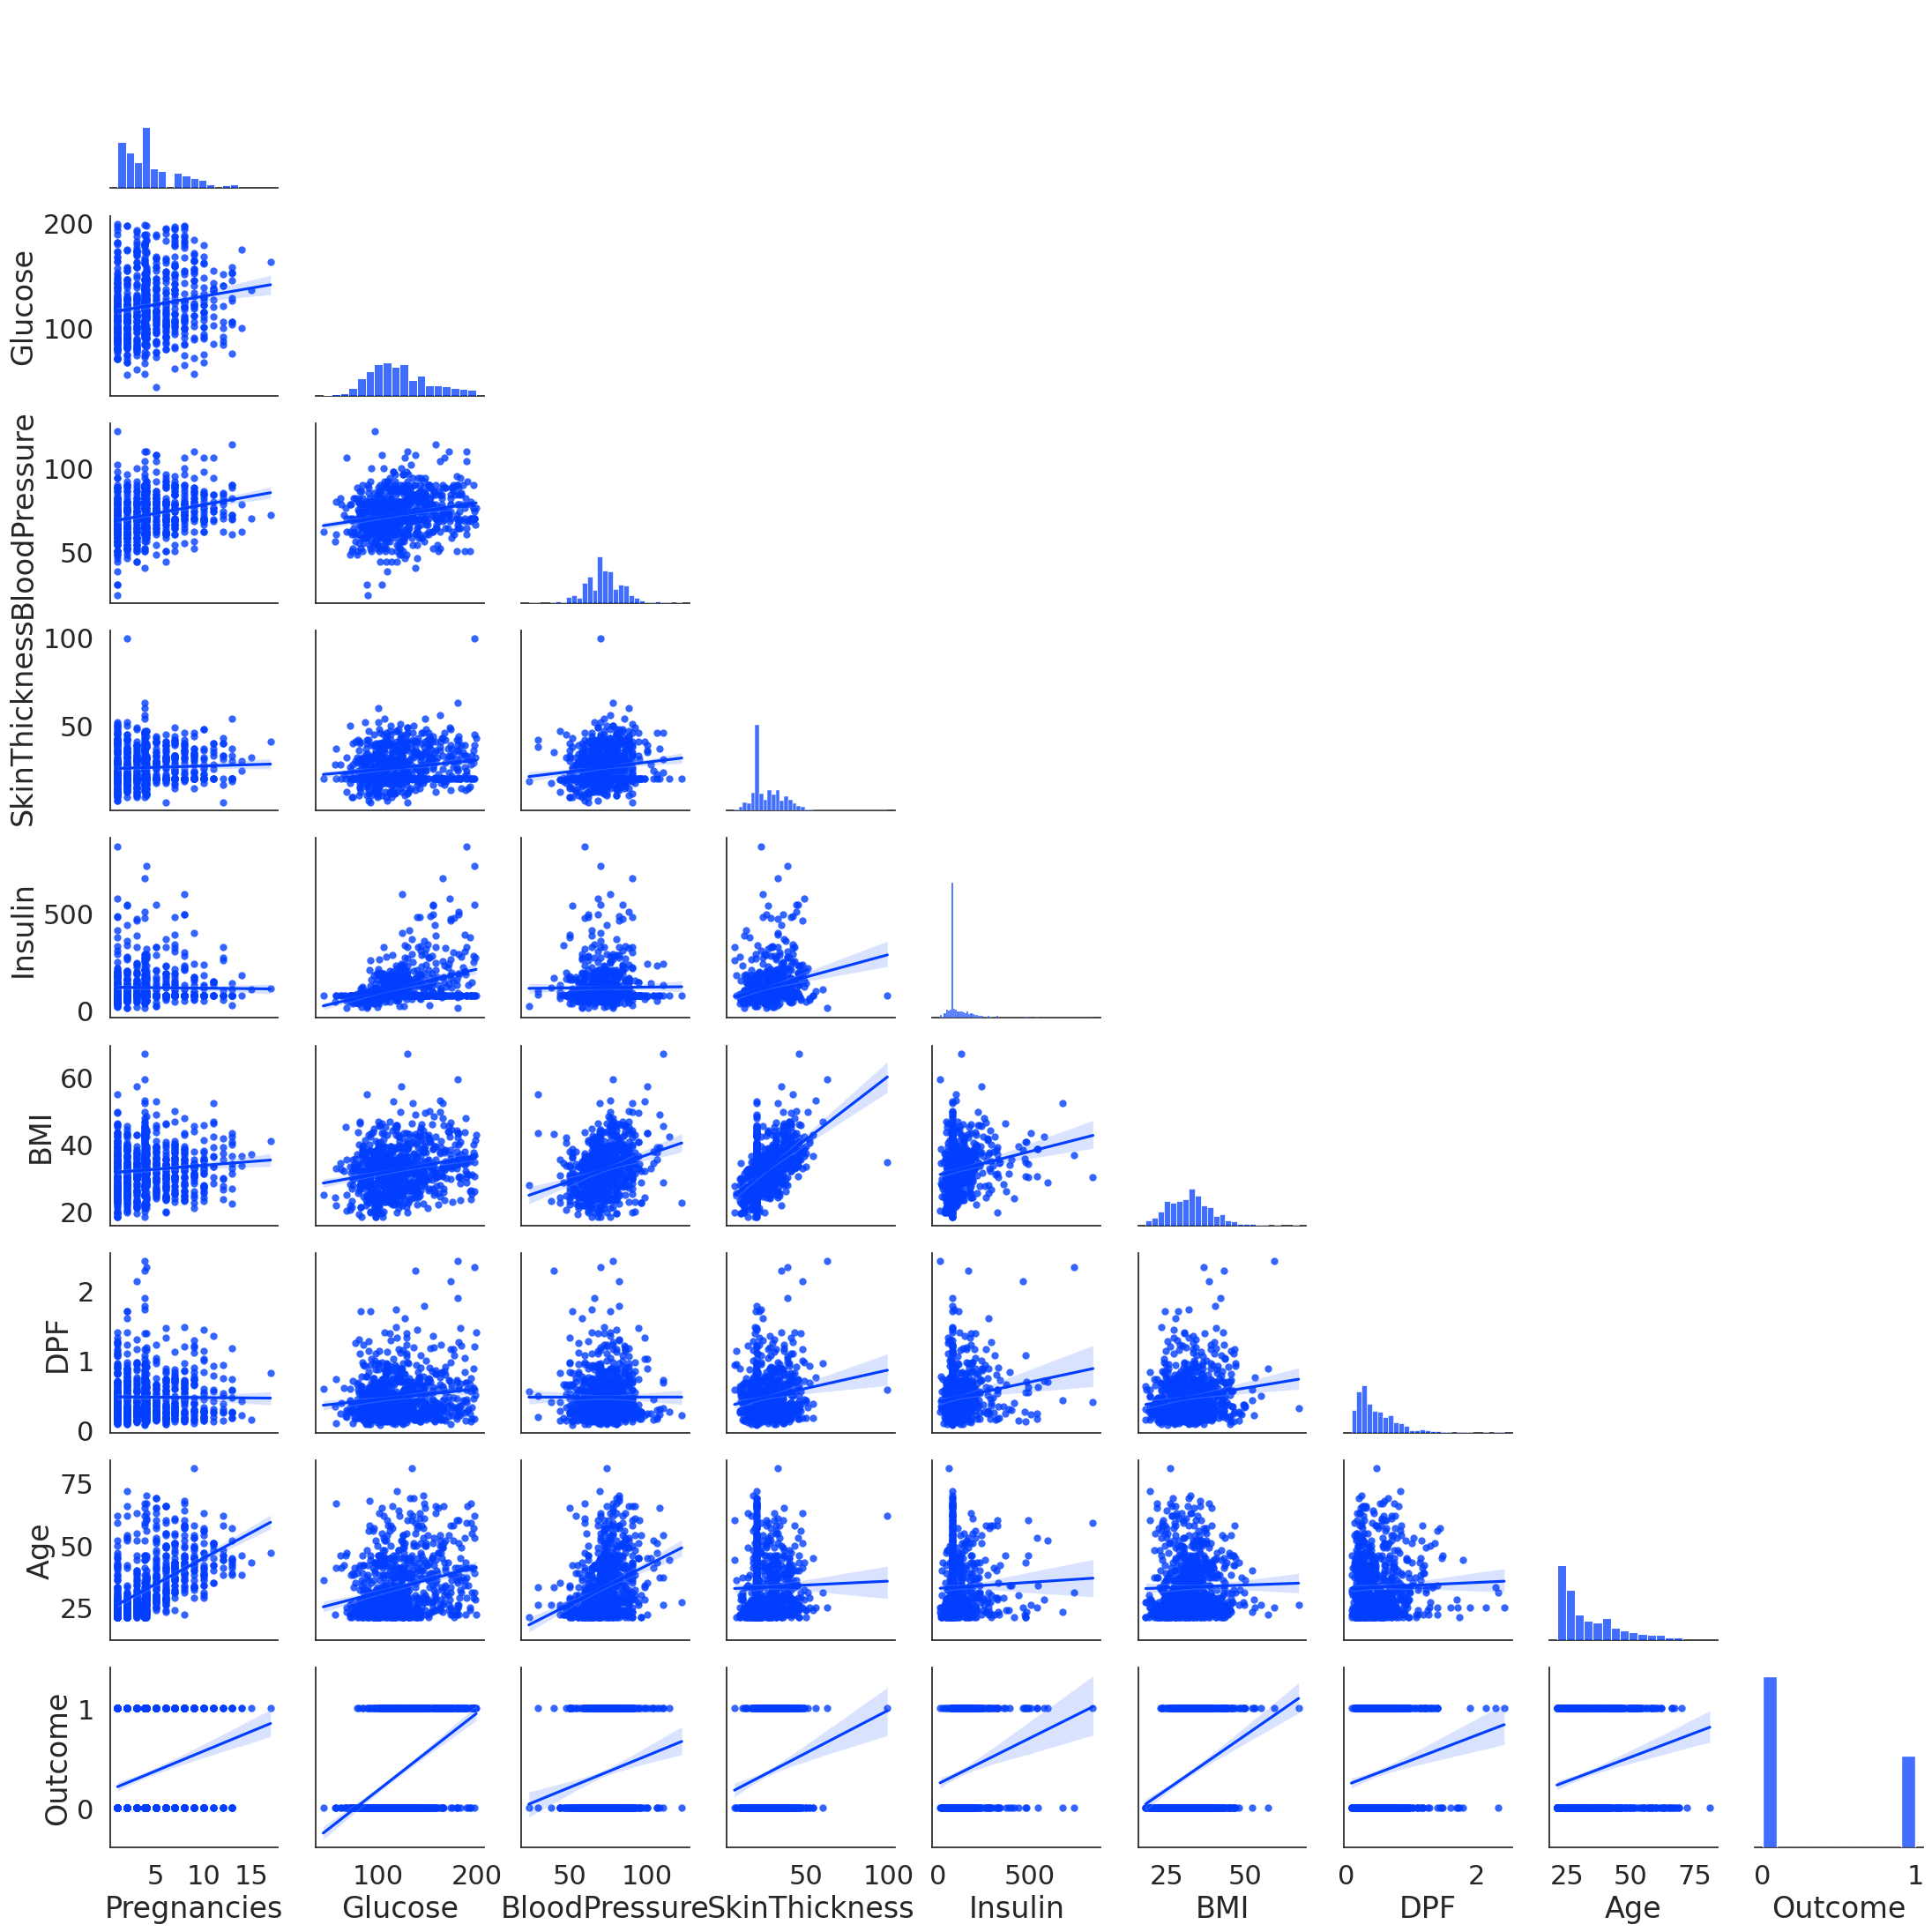

In [ ]:
sns.set(font_scale=2)
plt.figure(figsize=(10, 8))
sns.set_style("white")
sns.set_palette("bright")
sns.pairplot(diabetes_df,kind = 'reg',corner = True,palette ='YlGnBu' )

Relaciones importantes entre variables:

**Glucose y Outcome:**

La relación entre glucosa y el resultado es fuerte, como se esperaba. Los niveles más altos de glucosa se asocian con un mayor riesgo de diabetes.
BMI y Outcome:

Las personas con mayor índice de masa corporal tienden a tener un resultado positivo para la diabetes, lo que está en línea con la comprensión médica de que el sobrepeso es un factor de riesgo importante para la diabetes tipo 2.

**Insulin y Glucose:**

Se observa una tendencia positiva entre los niveles de insulina y los niveles de glucosa. Esto tiene sentido porque las personas con niveles más altos de glucosa en sangre a menudo requieren más insulina para regular sus niveles de azúcar.

**Pregnancies y Age:**

Existe una clara correlación entre el número de embarazos y la edad, lo que es lógico, ya que las personas mayores han tenido más tiempo para tener más embarazos.

**Age y Outcome:**

Aunque la relación no es tan fuerte, se observa que las personas mayores tienen más probabilidades de ser diagnosticadas con diabetes.

Se elabora una histograma con un diagrama de caja sobrepuesto, generado con la biblioteca Plotly Express en Python. Este gráfico está dividido por la variable Outcome, lo que permite comparar la distribución de los niveles de glucosa entre personas con diabetes (Outcome = 1) y personas sin diabetes (Outcome = 0).

## **Verificación de las características antes de modelar**
Observando la figura anterior, el coeficiente de correlación entre Outcome y Glucose es el más alto, con un valor de 0.49. Vamos a examinar esto con más profundidad.

In [ ]:
fig = px.histogram(diabetes_df, x="Glucose",
                   color="Outcome",
                   marginal="box",
                   barmode ="overlay",
                   histnorm ='density'
                  )
fig.update_layout(
    title_font_color="black",
    legend_title_font_color="green",
    title={
        'text': "Glucose Histogram per Outcome",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)
fig.show()


**Comparación de distribuciones:**

Las personas con diabetes (Outcome = 1) tienden a tener niveles de glucosa significativamente más altos y una mayor variabilidad en sus niveles de glucosa en comparación con las personas sin diabetes.
El histograma muestra una clara separación en los niveles de glucosa, con una mayor concentración de personas sin diabetes en los rangos más bajos (alrededor de 80-120 mg/dL), mientras que las personas con diabetes tienden a concentrarse en los rangos más altos (120-180 mg/dL).

**Importancia clínica:**

El nivel de glucosa es un factor clave en la identificación de la diabetes, como lo muestran estas distribuciones. Las personas con niveles de glucosa elevados tienen más probabilidades de ser diagnosticadas con diabetes.
Este tipo de visualización puede ser útil para identificar umbrales en los niveles de glucosa que podrían ayudar en el diagnóstico o la prevención de la diabetes.

Se elabora un histograma del índice de masa corporal (BMI), dividido por la variable Outcome, lo que permite visualizar cómo el BMI varía entre personas con diabetes (Outcome = 1) y personas sin diabetes (Outcome = 0). Al igual que en la visualización anterior, este gráfico incluye un diagrama de caja sobre el histograma para una mayor comprensión de la distribución de los datos.

In [ ]:
import plotly.express as px
fig = px.histogram(diabetes_df, x="BMI",
                   color="Outcome",
                   marginal="box",
                   barmode ="overlay",
                   histnorm ='density'
                  )
fig.update_layout(
    title_font_color="black",
    legend_title_font_color="green",
    title={
        'text': "BMI Histogram per Outcome",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)
fig.show()

**Comparación de distribuciones:**

Las personas con diabetes (Outcome = 1) tienden a tener un BMI más alto y una mayor variabilidad en comparación con las personas sin diabetes (Outcome = 0).
Las personas sin diabetes se concentran en rangos de BMI más bajos, mientras que las personas con diabetes tienen una mayor densidad en los rangos de BMI más altos, especialmente por encima de 30.

Impacto clínico:
**bold text**
Este gráfico refuerza la idea de que un BMI elevado es un factor de riesgo significativo para la diabetes. Un BMI mayor de 30 parece estar asociado con un mayor riesgo de desarrollar diabetes.
Los datos sugieren que las personas con un BMI bajo o moderado tienen menos probabilidades de tener diabetes, mientras que aquellos con un BMI alto (especialmente por encima de 35) tienen un riesgo considerablemente mayor.

**Valores atípicos:**

Los puntos fuera de los bigotes en el diagrama de caja muestran valores atípicos (es decir, individuos con BMI extremadamente alto), que podrían ser casos extremos en los que el BMI es un factor determinante para la diabetes.

Elabora un histograma de la edad (Age), dividido por la variable Outcome, que representa si una persona tiene diabetes (Outcome = 1) o no (Outcome = 0). Similar a los gráficos anteriores, este gráfico incluye un diagrama de caja sobre el histograma para visualizar mejor la dispersión y los valores atípicos.

In [ ]:
import plotly.express as px
fig = px.histogram(diabetes_df, x="Age",
                   color="Outcome",
                   marginal="box",
                   barmode ="overlay",
                   histnorm ='density'
                  )
fig.update_layout(
    title_font_color="black",
    legend_title_font_color="green",
    title={
        'text': "Age Histogram per Outcome",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
)
fig.show()

**Comparación de distribuciones:**

Las personas con diabetes tienden a ser significativamente mayores que las personas sin diabetes, con una mayor concentración en los rangos de 45 a 65 años.
Las personas sin diabetes tienden a ser más jóvenes, con la mayoría de las personas en el rango de 20 a 40 años.

**Impacto clínico:**

La edad es un factor importante en el desarrollo de la diabetes, ya que las personas mayores parecen tener un riesgo mucho mayor de desarrollar la enfermedad. Esto es consistente con lo que se sabe sobre la diabetes tipo 2, que tiende a desarrollarse con más frecuencia en personas mayores.
Intervenciones tempranas en personas más jóvenes (en términos de control de la glucosa y hábitos de vida saludables) pueden ser clave para prevenir la diabetes en edades más avanzadas.

**Valores atípicos:**

Los puntos fuera de los bigotes en el diagrama de caja representan valores atípicos, en este caso, personas con diabetes que tienen una edad más avanzada. Esto indica que, aunque la mayoría de las personas con diabetes están en el rango de 45 a 65 años, algunos pacientes mayores (por encima de los 65) también tienen diabetes.

*A partir de las figuras anteriores, se puede observar qué distribución tiene cada característica para cada salida. En el caso de Glucose, que tiene una correlación alta, se puede ver que la distribución de los resultados 1 y 0 tiene una forma más diferenciada que otras características. En este caso, se espera que tenga un mejor efecto en la clasificación.*



---



## **Visualización del conjunto de datos de entrenamiento después de la reducción de dimensiones.**








# **2D**

**Primera parte: División del conjunto de datos en características y etiquetas**


In [ ]:
X_train = diabetes_df.drop('Outcome',axis=1)
y_train = diabetes_df['Outcome']

**Segunda parte: Instalación de bibliotecas y configuración de UMAP**

<Axes: >

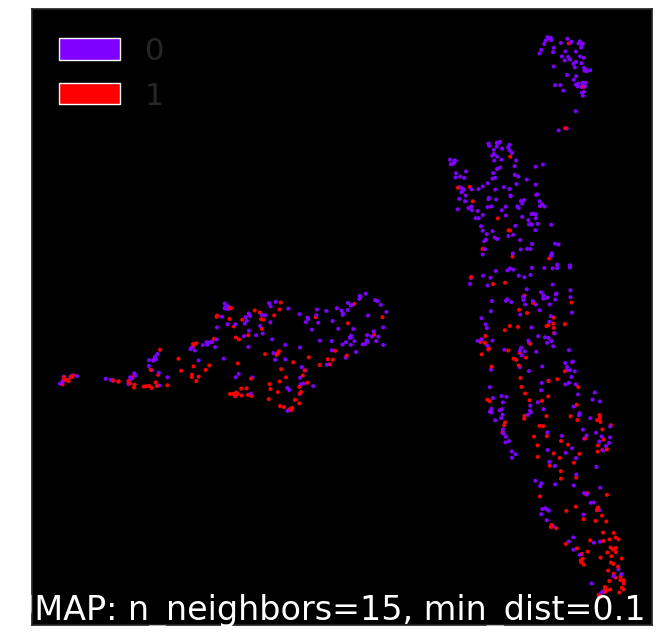

In [ ]:
!pip install pandas matplotlib datashader bokeh holoviews scikit-image colorcet
import umap
import umap.plot

mapper = umap.UMAP().fit(X_train)
umap.plot.points(mapper, labels=y_train, theme='fire')

 La figura muestra una superposición de clases en 2D, pero en el espacio de 8 dimensiones del conjunto de datos, los modelos tendrán una mejor capacidad para encontrar un límite de decisión entre las personas con y sin diabetes. La reducción de dimensionalidad a 2D permite visualizar los datos, no siempre refleja con precisión la complejidad del espacio de características original. Los modelos de machine learning, especialmente aquellos basados en árboles de decisión, son capaces de trabajar con múltiples dimensiones y encontrar límites de decisión más precisos que no son tan evidentes en 2D.

# **3D Plot**

Se realiza una reducción de dimensionalidad a 3D usando UMAP (Uniform Manifold Approximation and Projection) para visualizar el conjunto de datos en un espacio tridimensional (3D) y generar un gráfico de dispersión en 3D utilizando Plotly.

In [ ]:
from umap import UMAP

umap_3d = UMAP(n_components=3, init='random', random_state=0)
x_umap = umap_3d.fit_transform(X_train)
umap_df = pd.DataFrame(x_umap)
train_y_sr = pd.Series(y_train,name='label').astype(str)
print(type(x_umap))
new_df = pd.concat([umap_df,train_y_sr],axis=1)
fig = px.scatter_3d(
    new_df, x=0, y=1, z=2,
    color='label', labels={'color': 'number'}
)
fig.update_traces(marker_size=1.5)
fig.show()

<class 'numpy.ndarray'>


Puntos rojos y morados:

Los puntos rojos representan personas con diabetes (Outcome = 1).
Los puntos morado representan personas sin diabetes (Outcome = 0).

UMAP ha intentado mantener la estructura de los datos de alta dimensionalidad en este espacio de 3 dimensiones, conservando la relación local entre los puntos. Esto significa que puntos cercanos en el espacio 8D original también tienden a estar cerca en el espacio 3D.
Esta visualización en 3D proporciona una mejor percepción espacial que la visualización 2D, permitiendo ver más claramente cómo se agrupan o separan los puntos según sus etiquetas.

### **Modelos en conjunto (Ensemble Models):**

Los algoritmos de aprendizaje supervisado realizan la tarea de buscar en un espacio de hipótesis para encontrar una hipótesis adecuada que permita hacer buenas predicciones en un problema particular. Incluso si el espacio de hipótesis contiene hipótesis que se adaptan muy bien a un problema específico, puede ser muy difícil encontrar una buena. Los ensemble (modelos en conjunto) combinan múltiples hipótesis para formar (con suerte) una hipótesis mejor. El término ensemble generalmente se reserva para métodos que generan múltiples hipótesis utilizando el mismo modelo base (base learner). El término más amplio de sistemas de clasificación múltiple también cubre la hibridación de hipótesis que no son inducidas por el mismo modelo base.

# **Instalación de PyCaret:**



In [ ]:
!pip install pycaret
from pycaret.classification import *

El propósito de este código es configurar y preparar el conjunto de datos diabetes_df para el entrenamiento de un modelo de clasificación, especificando que Outcome es la variable que se quiere predecir (diabetes o no).


Al desactivar el preprocesamiento automático (preprocess=False), se asume que el conjunto de datos ya ha sido limpiado y preparado. Al mismo tiempo, al establecer verbose=False, se evita mostrar información detallada durante este proceso de configuración.


Este paso es esencial en PyCaret, ya que permite establecer el entorno para los siguientes pasos, que incluyen la creación de modelos, ajuste de hiperparámetros y evaluación del rendimiento del modelo.

In [ ]:
clf1 = setup(data=diabetes_df,
             target='Outcome',
             preprocess=False,
             verbose=False)


# **Comparando Modelos**

Esta función entrena y evalúa el rendimiento de todos los estimadores disponibles en la biblioteca de modelos utilizando validación cruzada. La salida de esta función es una cuadrícula de puntuaciones con los puntajes promedio validados cruzadamente.

In [ ]:
top5 = compare_models(sort='AUC',
                      n_select = 5,
                      exclude=['lightgbm','xgboost','dummy','svm','ridge','knn','dt','nb','qda']
                     )

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7485,0.8287,0.5673,0.6693,0.6104,0.4273,0.4333,0.1910
rf,Random Forest Classifier,0.7578,0.8269,0.5827,0.6845,0.6218,0.4472,0.4553,0.3700
lr,Logistic Regression,0.7560,0.8220,0.5251,0.7112,0.5972,0.4292,0.4437,0.9150
lda,Linear Discriminant Analysis,0.7559,0.8220,0.5249,0.7108,0.5975,0.4293,0.4433,0.0270
et,Extra Trees Classifier,0.7393,0.8104,0.5456,0.6617,0.5917,0.4039,0.4124,0.2070
ada,Ada Boost Classifier,0.7448,0.8005,0.5892,0.6518,0.6119,0.4245,0.4307,0.1810


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

**El Gradient Boosting Classifier (gbc)** y el Random Forest Classifier (rf) son los mejores modelos según la métrica AUC, lo que significa que son los mejores para separar correctamente las clases.

**Random Forest (rf)** tiene la mayor precisión (0.7578), pero el Gradient Boosting tiene un AUC ligeramente superior, lo que lo hace el mejor modelo en términos de clasificación general.

**El Logistic Regression** y el **LDA** también son competitivos, pero tienen un AUC ligeramente más bajo y un recall menor.

**AdaBoost **tiene el rendimiento más bajo de todos los modelos comparados en términos de AUC, precisión y recall.

Este análisis sugiere que los mejores modelos para este conjunto de datos son Gradient Boosting Classifier y Random Forest Classifier en términos de AUC y otras métricas de rendimiento.

## **Creando Modelos**


Esta función entrena y evalúa el rendimiento de un estimador dado utilizando validación cruzada. La salida de esta función es una cuadrícula de puntuaciones con las puntuaciones de validación cruzada por cada pliegue (fold).

In [ ]:
import pycaret
print(pycaret.__version__)


3.3.2


In [ ]:
!pip install pycaret[full]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 32.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of selenium to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from pycaret.classification import models
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


Crear un modelo de Gradient Boosting Classifier (gbc) usando la función create_model() de PyCaret. La salida presenta los resultados de la validación cruzada, evaluando el modelo en varios pliegues (folds) y mostrando una serie de métricas de rendimiento.

In [ ]:
gbc = create_model('gbc')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7963,0.8180,0.6316,0.7500,0.6857,0.5367,0.5410
1,0.7778,0.8722,0.6316,0.7059,0.6667,0.5008,0.5025
2,0.7593,0.7940,0.5263,0.7143,0.6061,0.4384,0.4490
3,0.7593,0.8917,0.5263,0.7143,0.6061,0.4384,0.4490
4,0.7037,0.7910,0.5263,0.5882,0.5556,0.3344,0.3355
5,0.7593,0.8722,0.5789,0.6875,0.6286,0.4524,0.4561
6,0.7222,0.8586,0.4737,0.6429,0.5455,0.3520,0.3605
7,0.6792,0.7667,0.5000,0.5294,0.5143,0.2751,0.2754
8,0.7925,0.8222,0.5556,0.7692,0.6452,0.5038,0.5172


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

El modelo de **Gradient Boosting Classifie**r muestra un buen rendimiento en general, con un AUC promedio de 0.8287 y una precisión del 74.85%. Estos son indicadores de que el modelo puede diferenciar bien entre las clases.
Recall (56.73%) y Precision (66.93%) indican que el modelo está mejor en la precisión de las predicciones positivas que en su capacidad para encontrar todos los casos positivos.
El modelo presenta una variabilidad baja entre los pliegues, como lo indica la baja desviación estándar en todas las métricas.
Las métricas como F1-Score, Kappa, y MCC también indican que el modelo tiene un buen equilibrio y concordancia en la clasificación de los casos.
En resumen, este modelo de Gradient Boosting es confiable para este conjunto de datos, aunque hay margen de mejora en la identificación de más casos positivos (recall).








Se crea un **modelo de Random Forest Classifier **(rf) utilizando la función create_model() de PyCaret, que evalúa el modelo con validación cruzada en 10 pliegues (folds) y reporta varias métricas de rendimiento.

In [ ]:
rf = create_model('rf')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7593,0.7842,0.6316,0.6667,0.6486,0.4658,0.4661
1,0.7778,0.8609,0.6842,0.6842,0.6842,0.5128,0.5128
2,0.7963,0.8015,0.5263,0.8333,0.6452,0.5123,0.5389
3,0.8333,0.8970,0.7368,0.7778,0.7568,0.6301,0.6307
4,0.7222,0.8128,0.6316,0.6000,0.6154,0.3982,0.3985
5,0.7037,0.8677,0.3684,0.6364,0.4667,0.2812,0.3013
6,0.7778,0.8639,0.5263,0.7692,0.6250,0.4749,0.4921
7,0.6792,0.7286,0.5556,0.5263,0.5405,0.2944,0.2947
8,0.7358,0.8365,0.4444,0.6667,0.5333,0.3592,0.3736


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Precisión y AUC**: El modelo de Random Forest tiene una precisión promedio de 75.78% y un AUC promedio de 0.8269, lo que sugiere que el modelo tiene una buena capacidad de predicción general y puede diferenciar adecuadamente entre las clases (diabetes/no diabetes).

**Recall y Precisión:** El recall promedio es 58.27%, lo que significa que el modelo identifica correctamente solo un poco más de la mitad de los casos positivos, mientras que la precisión es 68.45%, lo que significa que una proporción significativa de las predicciones positivas son correctas.

**F1-Score:** El F1-Score de 0.6218 muestra un buen equilibrio entre la precisión y el recall, lo cual es importante en conjuntos de datos donde las clases pueden estar desbalanceadas.

**Desviación estándar (Std):** La desviación estándar en las métricas sugiere una variabilidad baja a moderada entre los pliegues, lo que indica que el modelo es relativamente consistente en su rendimiento en los diferentes subconjuntos de datos.

Se crea un **modelo de Logistic Regression (lr)** usando la función create_model() de PyCaret, que evalúa el modelo con validación cruzada en 10 pliegues (folds). A continuación, se muestra la interpretación de las métricas obtenidas en la tabla.

In [ ]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6852,0.7955,0.3684,0.5833,0.4516,0.2463,0.2591
1,0.8333,0.8496,0.6842,0.8125,0.7429,0.6209,0.6259
2,0.7778,0.7880,0.4211,0.8889,0.5714,0.4462,0.5029
3,0.7407,0.8602,0.5263,0.6667,0.5882,0.4028,0.4088
4,0.7778,0.8226,0.5263,0.7692,0.6250,0.4749,0.4921
5,0.7593,0.8331,0.4737,0.7500,0.5806,0.4236,0.4456
6,0.7593,0.8286,0.4737,0.7500,0.5806,0.4236,0.4456
7,0.6038,0.7349,0.3889,0.4118,0.4000,0.1046,0.1047
8,0.8491,0.8746,0.7222,0.8125,0.7647,0.6542,0.6566


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Precisión y AUC:** El modelo de Logistic Regression muestra una precisión promedio de 75.60% y un AUC promedio de 0.8220, lo que sugiere que el modelo tiene un rendimiento sólido y es capaz de diferenciar adecuadamente entre las clases.

**Recall y Precisión:** El recall promedio de 52.51% indica que el modelo no identifica todos los casos positivos, mientras que la precisión de 71.12% muestra que la mayoría de las predicciones positivas son correctas. Esto implica que el modelo tiene un buen desempeño en la identificación de positivos cuando los predice, pero aún pierde una parte significativa de los casos positivos.

**F1-Score:** El F1-Score de 0.5972 refleja un equilibrio moderado entre la precisión y el recall, lo que sugiere que el modelo maneja de manera equilibrada ambos aspectos, pero aún puede mejorar.

**Variabilidad:** La desviación estándar (Std) es relativamente baja en todas las métricas, lo que indica que el modelo es consistente en su rendimiento a lo largo de los diferentes pliegues de validación cruzada.

En resumen, el modelo de Logistic Regression es un modelo fiable para este conjunto de datos, con buenos resultados en términos de precisión y AUC. Sin embargo, podría beneficiarse de un ajuste de hiperparámetros o de técnicas de mejora para mejorar su capacidad de detectar más casos positivos (mejorar el recall).

Se crea un **modelo de Linear Discriminant Analysis (LDA)** utilizando la función create_model() de PyCaret, que evalúa el modelo mediante validación cruzada en 10 pliegues (folds).

In [ ]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6852,0.7895,0.3684,0.5833,0.4516,0.2463,0.2591
1,0.8333,0.8436,0.6842,0.8125,0.7429,0.6209,0.6259
2,0.7778,0.7820,0.4211,0.8889,0.5714,0.4462,0.5029
3,0.7407,0.8602,0.5263,0.6667,0.5882,0.4028,0.4088
4,0.7963,0.8195,0.5789,0.7857,0.6667,0.5248,0.5375
5,0.7593,0.8436,0.4737,0.7500,0.5806,0.4236,0.4456
6,0.7593,0.8361,0.4737,0.7500,0.5806,0.4236,0.4456
7,0.6038,0.7444,0.3889,0.4118,0.4000,0.1046,0.1047
8,0.8491,0.8762,0.7222,0.8125,0.7647,0.6542,0.6566


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Precisión y AUC:** El modelo de LDA tiene una precisión promedio de 75.59% y un AUC promedio de 0.8220, lo que indica un buen rendimiento general y una capacidad adecuada para diferenciar entre las clases.

**Recall y Precisión:** El recall de 52.49% sugiere que el modelo no identifica todos los casos positivos, mientras que la precisión de 71.08% muestra que una proporción significativa de las predicciones positivas son correctas.

**F1-Score:** El F1-Score de 0.5975 refleja un equilibrio moderado entre precisión y recall, lo que significa que el modelo maneja relativamente bien tanto la precisión como la capacidad para encontrar los casos positivos.

**Variabilidad:** La desviación estándar (Std) es relativamente baja, lo que indica que el modelo es consistente en su rendimiento a lo largo de los diferentes pliegues de validación cruzada.

En resumen, el modelo de LDA muestra un rendimiento sólido, con un buen equilibrio entre precisión y recall. El modelo tiene un buen desempeño general, aunque podría beneficiarse de ajustes adicionales para mejorar su capacidad de detección de casos positivos (recall).

*En resumen, Gradient Boosting y Random Forest son los modelos más adecuados para este conjunto de datos, y la elección final dependerá de si se prioriza una mayor capacidad de discriminación (AUC) o una mayor precisión y recall.*

# **Ajuste de Hiperparámetros**

Esta función ajusta los hiperparámetros de un estimador dado. La salida de esta función es una cuadrícula de puntuaciones con los puntajes de validación cruzada por pliegue del mejor modelo seleccionado basado en el parámetro de optimización.

La función models() de PyCaret, que genera una lista de todos los modelos de clasificación disponibles en la biblioteca, junto con información relevante sobre cada uno de ellos.

In [ ]:
from pycaret.classification import models
models()


,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
!pip install pycaret[full]


In [ ]:
gbc = create_model('gbc')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7963,0.8180,0.6316,0.7500,0.6857,0.5367,0.5410
1,0.7778,0.8722,0.6316,0.7059,0.6667,0.5008,0.5025
2,0.7593,0.7940,0.5263,0.7143,0.6061,0.4384,0.4490
3,0.7593,0.8917,0.5263,0.7143,0.6061,0.4384,0.4490
4,0.7037,0.7910,0.5263,0.5882,0.5556,0.3344,0.3355
5,0.7593,0.8722,0.5789,0.6875,0.6286,0.4524,0.4561
6,0.7222,0.8586,0.4737,0.6429,0.5455,0.3520,0.3605
7,0.6792,0.7667,0.5000,0.5294,0.5143,0.2751,0.2754
8,0.7925,0.8222,0.5556,0.7692,0.6452,0.5038,0.5172


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
import pycaret
print(pycaret.__version__)


3.3.2


In [ ]:
# Crear otro modelo si catboost no está disponible
gbc = create_model('gbc')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7963,0.8180,0.6316,0.7500,0.6857,0.5367,0.5410
1,0.7778,0.8722,0.6316,0.7059,0.6667,0.5008,0.5025
2,0.7593,0.7940,0.5263,0.7143,0.6061,0.4384,0.4490
3,0.7593,0.8917,0.5263,0.7143,0.6061,0.4384,0.4490
4,0.7037,0.7910,0.5263,0.5882,0.5556,0.3344,0.3355
5,0.7593,0.8722,0.5789,0.6875,0.6286,0.4524,0.4561
6,0.7222,0.8586,0.4737,0.6429,0.5455,0.3520,0.3605
7,0.6792,0.7667,0.5000,0.5294,0.5143,0.2751,0.2754
8,0.7925,0.8222,0.5556,0.7692,0.6452,0.5038,0.5172


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
pip install catboost


In [ ]:
!pip install catboost

In [ ]:
import catboost
print(catboost.__version__)


1.2.7


## **Stacking**

El modelo de Stacking es utilizado mediante la función stack_models() de PyCaret. El Stacking es una técnica de ensamblaje de modelos donde varios algoritmos se combinan y un modelo "meta" (también llamado meta-model) aprende a partir de las predicciones de los modelos base.

In [ ]:
stack_model = stack_models(estimator_list = top5, meta_model = top5[0],optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6667,0.7662,0.4211,0.5333,0.4706,0.2322,0.2357
1,0.7593,0.7955,0.6316,0.6667,0.6486,0.4658,0.4661
2,0.7407,0.7820,0.4737,0.6923,0.5625,0.3874,0.4014
3,0.7407,0.8571,0.5263,0.6667,0.5882,0.4028,0.4088
4,0.7778,0.8346,0.7368,0.6667,0.7000,0.5242,0.5259
5,0.7037,0.8436,0.4737,0.6000,0.5294,0.3175,0.3223
6,0.6852,0.8075,0.4737,0.5625,0.5143,0.2839,0.2862
7,0.7170,0.7556,0.5556,0.5882,0.5714,0.3604,0.3607
8,0.7547,0.8365,0.6111,0.6471,0.6286,0.4457,0.4461


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

**Explicación del código**:

**stack_models():** Esta función crea un modelo basado en el ensamblaje por apilamiento (stacking). Combina varios modelos para hacer predicciones más robustas.


**estimator_list=top5:** Esta es la lista de modelos base que se van a utilizar para el stacking. En este caso, se está utilizando una lista de los cinco mejores modelos que se seleccionaron previamente (almacenados en la variable top5).

**meta_model=top5[0]:** El primer modelo en la lista (top5[0]) se utiliza como el meta-modelo. Es decir, este modelo aprende a partir de las predicciones de los cinco modelos base para realizar las predicciones finales.

**optimize='AUC':** Se especifica que el modelo debe ser optimizado en función del AUC (Área Bajo la Curva). Esto significa que el AUC será el criterio utilizado para seleccionar el mejor modelo durante el proceso de apilamiento.

El AUC promedio es de 0.8035, lo que indica que el modelo tiene una buena capacidad para discriminar entre las clases. Sin embargo, en términos de precisión (72.06%) y recall (55.15%), el rendimiento es moderado.

El modelo tiene un F1-Score de 0.5764, lo que sugiere que hay un equilibrio entre la precisión y el recall, aunque hay margen de mejora en términos de sensibilidad (recall).

La Kappa y el MCC indican que el modelo tiene una concordancia moderada con las etiquetas reales y un rendimiento aceptable en la clasificación de los datos.

El uso de múltiples modelos base y un meta-modelo en el stacking ayuda a mejorar el rendimiento del modelo final al aprovechar las fortalezas de varios algoritmos.

 La función plot_model() en PyCaret. Proporcion un gráfico que visualiza  las fronteras de decisión del modelo de apilamiento (stacking model) que fue creado anteriormente. Las fronteras de decisión son las áreas en el espacio de características donde el modelo predice diferentes clases (en este caso, las clases 0 y 1).

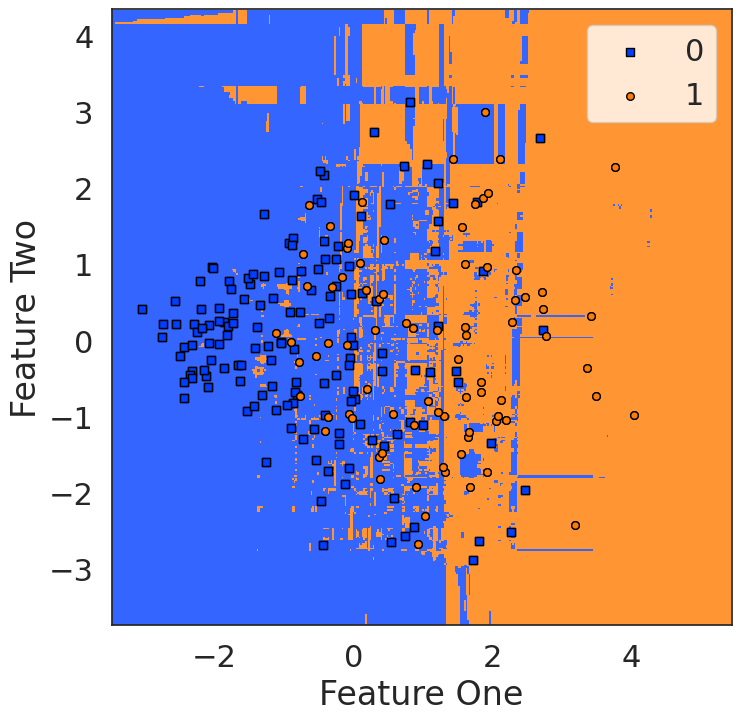

In [ ]:
plt.figure(figsize=(8, 8))
plot_model(stack_model, plot='boundary')

Los puntos cuadrados y circulares representan las observaciones reales del conjunto de datos.
Cuadrados azules son observaciones de la clase 0.
Círculos naranjas son observaciones de la clase 1.

El gráfico visualiza cómo el modelo de apilamiento separa las dos clases (0 y 1) en función de las dos características. Las fronteras de decisión complejas reflejan el intento del modelo por clasificar correctamente las observaciones, aunque aún hay algo de confusión en las áreas de superposición entre las clases. Este tipo de visualización es útil para entender cómo el modelo se comporta en un espacio de características reducido y cómo maneja la separación de las clases.

El modelo de StackingClassifier en PyCaret, genera  un gráfico que ayuda a evaluar el rendimiento de un modelo de clasificación. El Área Bajo la Curva (AUC) se utiliza para medir qué tan bien el modelo distingue entre las clases.

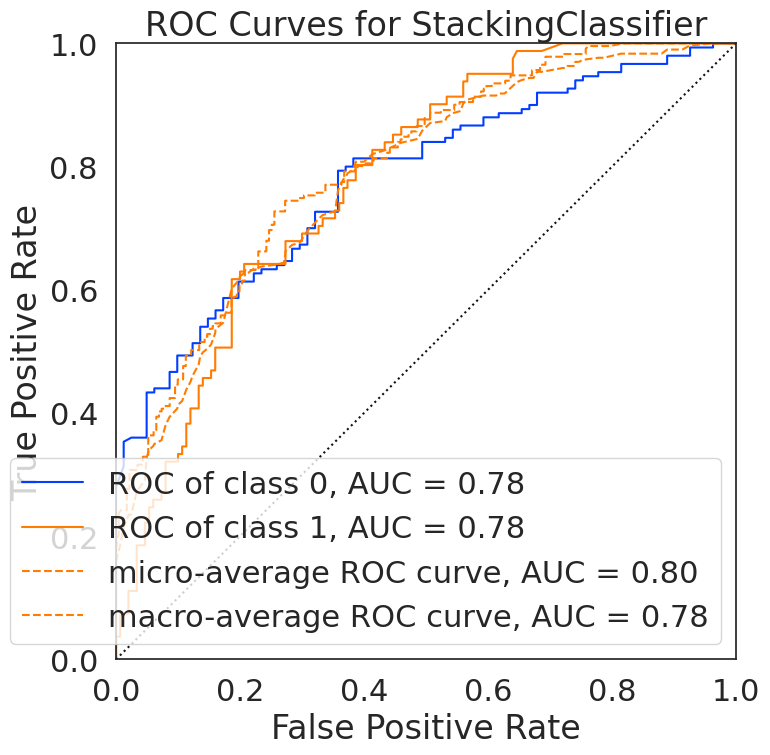

In [ ]:
plt.figure(figsize=(8, 8))
plot_model(stack_model, plot = 'auc')

**AUC:** El AUC para ambas clases es 0.78, lo que indica que el modelo tiene una buena capacidad para discriminar entre las clases (diabetes y no diabetes). Un AUC cercano a 1 significa un modelo perfecto, mientras que un AUC de 0.5 indica un modelo sin capacidad de discriminación (como lanzar una moneda al aire). En este caso, un AUC de 0.78 es un buen rendimiento, aunque no perfecto.


**Micro-average AUC (0.80):** Considera todas las muestras, independientemente de la clase. Este valor ligeramente superior a los AUC individuales sugiere que el modelo tiene un buen rendimiento global al clasificar tanto la clase positiva como la negativa.


**Macro-average AUC (0.78):**  Es el promedio de los AUC de ambas clases. Este valor confirma que el modelo mantiene un rendimiento equilibrado al clasificar ambas clases.

In [ ]:
#prediction
pred = stack_model.predict(X_test)
pred_proba = stack_model.predict_proba(X_test)[:,1]
#Accuracy
confusion_stack = get_clf_eval(y_test,pred,pred_proba)

accuracy: 0.7500, precision: 0.6479, recall: 0.6667,    F1: 0.6571, AUC:0.8502


# **Métricas calculadas:**
**Accuracy (Precisión):**

El modelo tiene una precisión del 75.0%, lo que significa que clasifica correctamente el 75% de las observaciones.

**Precision (Precisión para la clase positiva):**

La precisión es 0.6479. Esto significa que el 64.79% de las observaciones que fueron predichas como positivas son realmente positivas.

**Recall (Sensibilidad para la clase positiva):**

El recall es 0.6667, lo que indica que el modelo identificó correctamente el 66.67% de las observaciones positivas.

**F1-Score:**

El F1-Score es 0.6571, que es la media armónica entre la precisión y el recall. Esto indica un buen equilibrio entre las dos métricas.

**AUC (Área Bajo la Curva ROC):**

El AUC es 0.8502, lo que sugiere que el modelo tiene una buena capacidad para discriminar entre las clases.

Text(0.5, 1.0, 'Confusion Matrix (Stacking)')

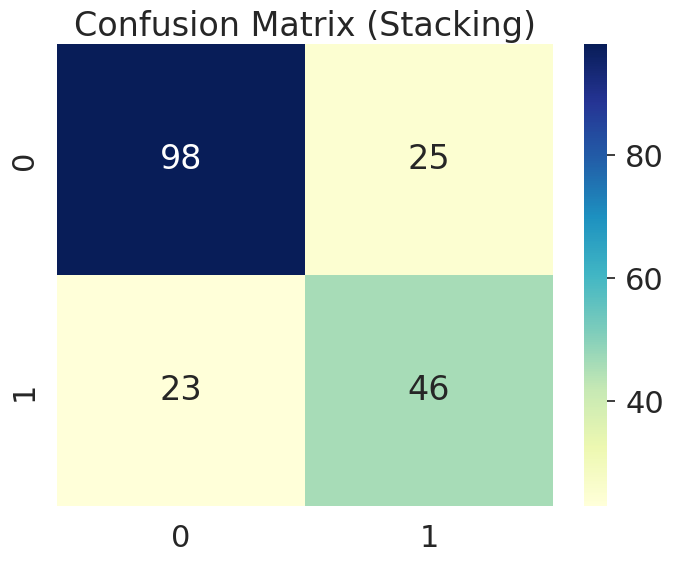

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_stack, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (Stacking)')

**Interpretación de la Matriz de Confusión:**

El modelo tiene un buen rendimiento general, con un alto número de verdaderos negativos (98) y verdaderos positivos (46).

Sin embargo, hay algunos falsos positivos (25) y falsos negativos (23), lo que significa que el modelo a veces clasifica erróneamente las observaciones.

### **Soft Voting (Votación suave)**
Esta función entrena un clasificador de Votación Suave (Soft Voting) para los modelos seleccionados que se pasan en el parámetro estimator_list. La salida de esta función es una cuadrícula de puntuaciones con los puntajes de validación cruzada por pliegue (CV scores by fold).


**Votación Suave (Soft Voting):**
En un clasificador de votación suave, en lugar de que cada modelo en la lista de estimadores simplemente emita un voto "duro" (es decir, una predicción categórica), cada modelo produce una probabilidad de que una observación pertenezca a cada clase.
Luego, las probabilidades se promedian y la clase con la mayor probabilidad promedio es la predicción final.

**estimator_list:**
Este parámetro es una lista de los modelos que se utilizarán en la votación suave. Cada uno de los modelos incluidos en la lista contribuirá con sus predicciones de probabilidad para determinar la clase final.

**Salida:**
La función devuelve una cuadrícula de puntuaciones que muestra el rendimiento del modelo de votación suave en cada pliegue de la validación cruzada. Esto incluye métricas como precisión, AUC, recall, F1, etc., calculadas en diferentes pliegues del conjunto de datos.

In [ ]:
blend_soft = blend_models(estimator_list = top5, optimize = 'AUC',method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.8075,0.5789,0.7333,0.6471,0.4882,0.4954
1,0.7963,0.8812,0.6842,0.7222,0.7027,0.5479,0.5484
2,0.7593,0.8030,0.4211,0.8000,0.5517,0.4081,0.4474
3,0.7593,0.8932,0.5263,0.7143,0.6061,0.4384,0.4490
4,0.7407,0.8180,0.5789,0.6471,0.6111,0.4176,0.4190
5,0.7593,0.8662,0.4737,0.7500,0.5806,0.4236,0.4456
6,0.7778,0.8586,0.5263,0.7692,0.6250,0.4749,0.4921
7,0.6792,0.7492,0.5556,0.5263,0.5405,0.2944,0.2947
8,0.7925,0.8619,0.5556,0.7692,0.6452,0.5038,0.5172


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

# **Métricas promedio:**
**Accuracy (Precisión):**
0.7616: El modelo mezcla de votación suave tiene una precisión promedio del 76.16%, lo que significa que el modelo clasifica correctamente el 76.16% de las observaciones.

**AUC (Área Bajo la Curva ROC):**
0.8374: Esta métrica indica la capacidad del modelo para distinguir entre las clases. Un valor de 0.8374 indica que el modelo tiene un buen rendimiento en la discriminación entre las clases.

**Recall (Sensibilidad):**
0.5623: El modelo identifica correctamente el 56.23% de las observaciones de la clase positiva (recall). Esto indica que el modelo tiene una capacidad moderada para detectar los casos positivos.

**Precision (Precisión):**
0.7082: De todas las observaciones que el modelo predice como positivas, el 70.82% son realmente positivas. Esto refleja una precisión alta en las predicciones positivas.

**F1-Score:**
0.6194: El F1-Score es la media armónica entre la precisión y el recall, lo que indica un equilibrio entre ambas métricas. En este caso, el F1-Score es de 0.6194, lo que sugiere un rendimiento razonable.

**Kappa:**
0.4505: El valor de Kappa mide la concordancia entre las predicciones y las etiquetas reales, ajustado por la concordancia aleatoria. Un valor de 0.4505 sugiere una concordancia moderada entre las predicciones del modelo y las etiquetas reales.

**MCC (Coeficiente de Correlación de Matthews):**
0.4619: El MCC es una métrica que tiene en cuenta tanto los verdaderos positivos como los verdaderos negativos, y un valor de 0.4619 sugiere que el modelo tiene una capacidad moderada para clasificar correctamente tanto los positivos como los negativos.

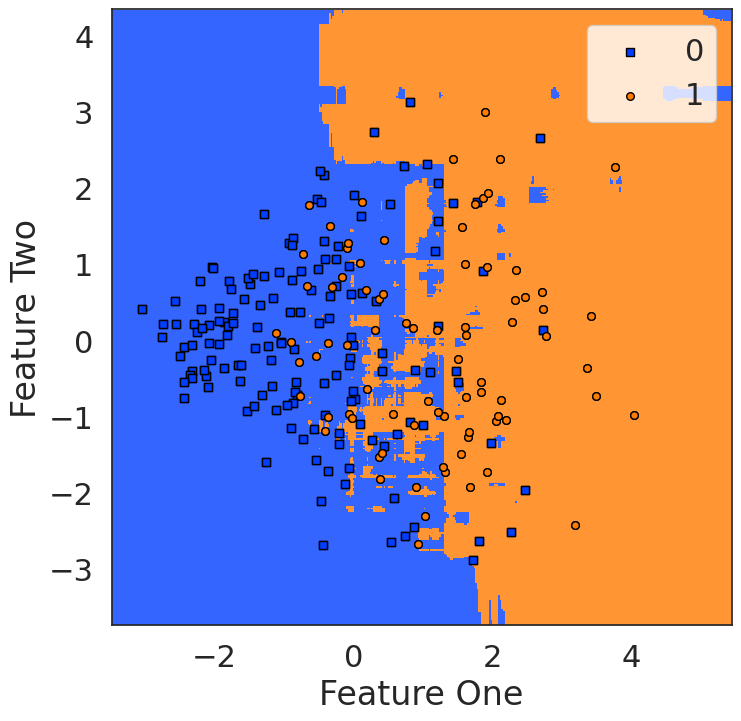

In [ ]:
plt.figure(figsize=(8, 8))
plot_model(blend_soft, plot='boundary')

# **Interpretación del gráfico:**

**Colores de fondo:**
Azul: Representa el área donde el modelo predice la clase 0.
Naranja: Representa el área donde el modelo predice la clase 1.

**Puntos:**
Cuadrados azules: Observaciones reales de la clase 0 (negativas).
Círculos naranjas: Observaciones reales de la clase 1 (positivas).

**Fronteras de decisión:**
Las líneas entre las áreas azul y naranja representan las fronteras de decisión del modelo. Estas son las regiones donde el modelo cambia de predecir la clase 0 a predecir la clase 1.
El modelo trata de crear una división clara entre las dos clases en el espacio de características, pero hay ciertas áreas donde las fronteras son más complejas, lo que indica que las características no permiten una separación perfecta de las clases.

**Superposición de clases:**
Se puede observar que varios puntos de la clase 0 (cuadrados azules) se encuentran en la región naranja, lo que indica que fueron clasificados incorrectamente como pertenecientes a la clase 1 (falsos positivos).
De igual manera, algunos puntos de la clase 1 (círculos naranjas) están ubicados en la región azul, lo que sugiere que fueron clasificados incorrectamente como pertenecientes a la clase 0 (falsos negativos).

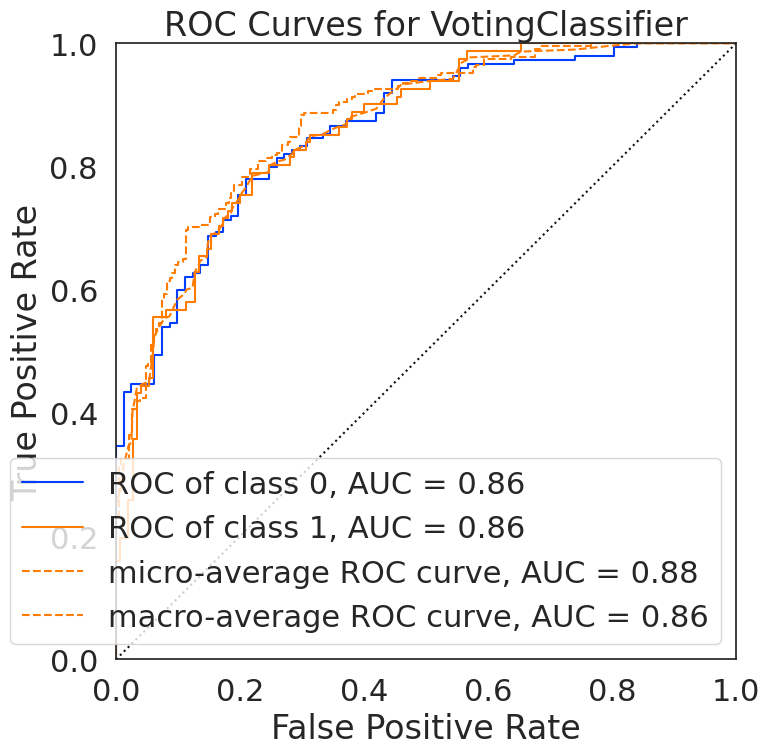

In [ ]:
plt.figure(figsize=(8, 8))
plot_model(blend_soft, plot = 'auc')

El modelo tiene un AUC de 0.86 para ambas clases (0 y 1), lo que indica una buena capacidad para distinguir entre las clases positiva y negativa.

El AUC micro-promedio de 0.88 sugiere que el modelo funciona bien en general para todo el conjunto de datos.

Las curvas ROC muestran que el modelo tiene un buen equilibrio entre la tasa de verdaderos positivos y falsos positivos, lo que lo convierte en un modelo fiable para la clasificación.

In [ ]:
#prediction
pred = blend_soft.predict(X_test)
pred_proba = blend_soft.predict_proba(X_test)[:,1]
#Accuracy
confusion_soft = get_clf_eval(y_test,pred,pred_proba)

accuracy: 0.8958, precision: 0.8267, recall: 0.8986,    F1: 0.8611, AUC:0.9565


El modelo de votación suave (blend_soft) tiene un rendimiento muy bueno. Su precisión global es alta (89.58%), y las métricas de precisión (82.67%) y recall (89.86%) indican que el modelo no solo es efectivo en identificar correctamente las observaciones positivas, sino que también mantiene un equilibrio sólido entre identificar los verdaderos positivos y minimizar los falsos positivos. El AUC de 0.9565 sugiere que el modelo tiene una excelente capacidad de discriminación entre las clases, lo cual es ideal para problemas de clasificación.

Text(0.5, 1.0, 'Confusion Matrix (Soft Blending)')

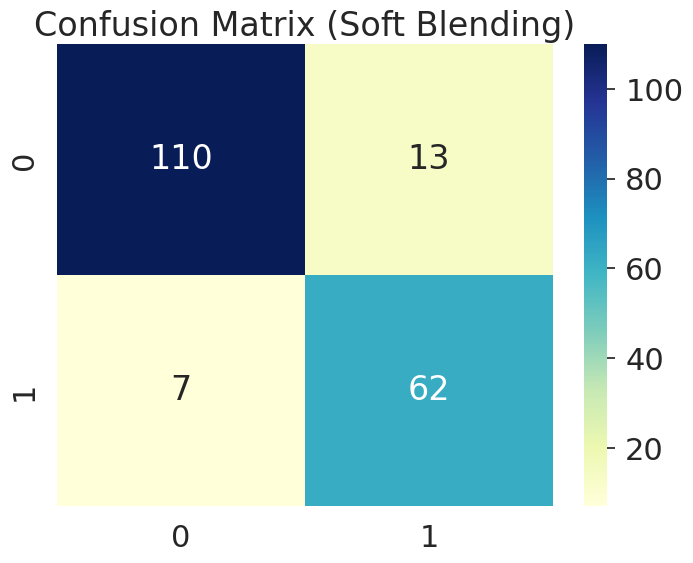

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_soft, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (Soft Blending)')

El modelo de Soft Blending tiene un buen rendimiento general, con un total de 110 verdaderos negativos y 62 verdaderos positivos.

Los falsos positivos (13) y falsos negativos (7) son relativamente bajos, lo que indica que el modelo tiene un buen equilibrio entre la identificación correcta de las clases positivas y negativas.

La matriz de confusión indica que el modelo clasifica correctamente la mayoría de las observaciones, pero aún tiene algunos errores de clasificación, especialmente cuando confunde observaciones negativas como positivas.

# **Hard Voting (votación dura)**

Esta función entrena un clasificador de Regla de la Mayoría para los modelos seleccionados que se pasan en el parámetro estimator_list. El resultado de esta función es una cuadrícula de puntajes con puntuaciones de validación cruzada (CV) por cada pliegue.

In [ ]:
blend_hard = blend_models(estimator_list = top5, optimize = 'AUC',method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7407,0.0000,0.5263,0.6667,0.5882,0.4028,0.4088
1,0.8148,0.0000,0.6842,0.7647,0.7222,0.5840,0.5860
2,0.7593,0.0000,0.4211,0.8000,0.5517,0.4081,0.4474
3,0.7778,0.0000,0.5789,0.7333,0.6471,0.4882,0.4954
4,0.7407,0.0000,0.5263,0.6667,0.5882,0.4028,0.4088
5,0.7778,0.0000,0.5263,0.7692,0.6250,0.4749,0.4921
6,0.7593,0.0000,0.4737,0.7500,0.5806,0.4236,0.4456
7,0.6415,0.0000,0.4444,0.4706,0.4571,0.1899,0.1900
8,0.8113,0.0000,0.5556,0.8333,0.6667,0.5423,0.5640


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

La votación dura parece generar resultados razonables en términos de precisión y recall, aunque el AUC no es aplicable en este caso.

El modelo muestra un buen equilibrio entre precisión y recall, con un F1-Score decente, lo que indica que maneja bien las clases positivas y negativas.

Aunque el rendimiento global es bueno, el uso de votación dura en este caso puede no ser el mejor enfoque si se desea maximizar el AUC, ya que no se tienen en cuenta las probabilidades de las predicciones.

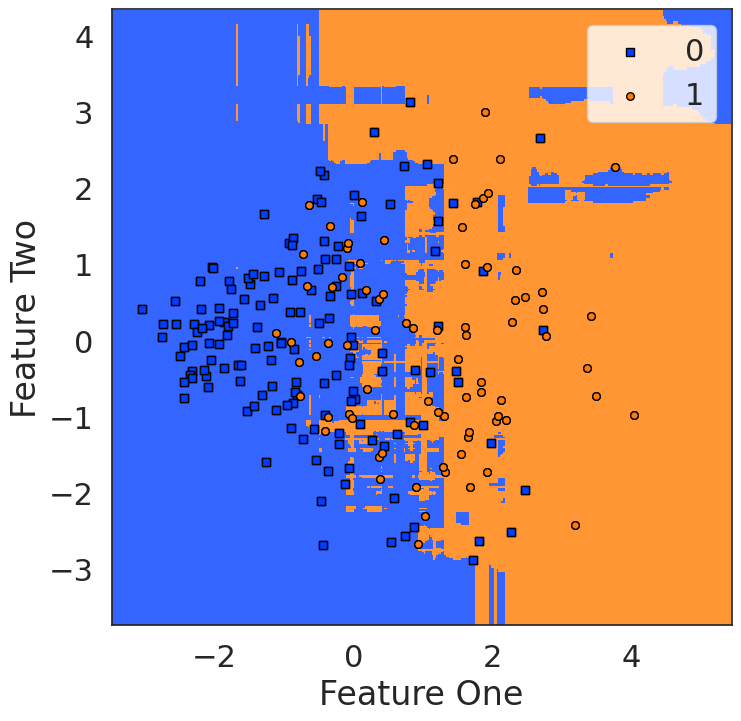

In [ ]:
plt.figure(figsize=(8, 8))
plot_model(blend_hard, plot='boundary')

El modelo ha intentado trazar una frontera entre las clases 0 y 1. La línea entre las áreas azul y naranja representa la frontera de decisión del modelo.

Superposición de clases: Como se observa, hay bastante superposición entre las dos clases en la región central del gráfico (alrededor de los valores de Feature One entre -1 y 2). Esto puede sugerir que el modelo tiene dificultades para separar completamente las dos clases en este espacio de características.

Errores de clasificación: Los puntos dispersos que están en las áreas equivocadas representan errores de clasificación. En la región azul (clase 0), hay algunos puntos naranjas (clase 1), y en la región naranja (clase 1), hay algunos puntos azules (clase 0), lo que muestra que el modelo no es perfecto en la predicción.

### **Predicción con el conjunto de datos de prueba**

In [ ]:
#prediction
pred = blend_hard.predict(X_test)
#Accuracy
confusion_hard = confusion_matrix( y_test, pred)
accuracy = accuracy_score(y_test , pred)
precision = precision_score(y_test , pred)
recall = recall_score(y_test , pred)
f1 = f1_score(y_test,pred)
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
F1: {3:.4f}'.format(accuracy, precision, recall, f1))

accuracy: 0.8906, precision: 0.8243, recall: 0.8841,F1: 0.8531


Text(0.5, 1.0, 'Confusion Matrix (Hard Blending)')

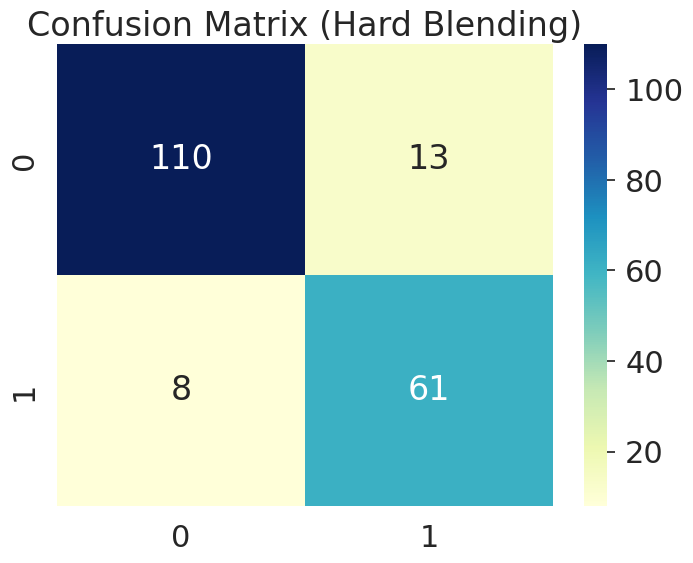

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_hard, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (Hard Blending)')

Mejorar la precisión: Aunque los resultados son bastante buenos, todavía hay 13 falsos positivos y 8 falsos negativos. Ajustando los hiperparámetros o usando técnicas adicionales de afinamiento, se puede intentar reducir estos errores.


Balance entre precisión y recall: Si el objetivo es maximizar la precisión (evitar falsos positivos) o el recall (minimizar falsos negativos), el modelo final puede ajustarse según las necesidades del proyecto. Dependiendo de la importancia de estos errores en el contexto del negocio o de la aplicación, se puede decidir optimizar más uno que el otro.


Validación cruzada y generalización: Aunque el modelo tiene una buena precisión, es importante asegurarse de que no esté sobreajustado (overfitting) a los datos de entrenamiento. Si el modelo final se afina demasiado para el conjunto de entrenamiento, puede tener problemas para generalizar a nuevos datos. Liberar el modelo ajustado garantiza que se generalice bien en situaciones del mundo real.

*El modelo ha logrado un buen desempeño general, con un recall relativamente alto y una precisión razonable. Sin embargo, se puede mejorar ajustando los hiperparámetros o aplicando técnicas avanzadas de regularización para mejorar aún más su capacidad de generalización en nuevos datos.*

# **Calibración del modelo final**

Esta función calibra la probabilidad de un estimador dado utilizando regresión isotónica o logística.








In [ ]:
cali_model = calibrate_model(blend_soft)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7222,0.8135,0.4211,0.6667,0.5161,0.3350,0.3524
1,0.7963,0.8872,0.6842,0.7222,0.7027,0.5479,0.5484
2,0.7778,0.7925,0.4211,0.8889,0.5714,0.4462,0.5029
3,0.7593,0.8977,0.5263,0.7143,0.6061,0.4384,0.4490
4,0.7778,0.8135,0.5789,0.7333,0.6471,0.4882,0.4954
5,0.7593,0.8632,0.4737,0.7500,0.5806,0.4236,0.4456
6,0.7778,0.8526,0.5263,0.7692,0.6250,0.4749,0.4921
7,0.6604,0.7587,0.5000,0.5000,0.5000,0.2429,0.2429
8,0.8302,0.8651,0.6111,0.8462,0.7097,0.5940,0.6098


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Después de la calibración, el modelo tiene un desempeño sólido, con un AUC elevado (0.8387) y una precisión razonable. Sin embargo, el recall relativamente bajo (0.5409) sugiere que el modelo está perdiendo una cantidad significativa de verdaderos positivos, lo que podría no ser ideal en escenarios donde la detección de todos los casos positivos es crítica. Para mejorar, se podría considerar ajustar los hiperparámetros o realizar técnicas adicionales de ajuste para equilibrar mejor la precisión y el recall.


# **Finalizando el último modelo**

Esta función entrena un estimador dado en todo el conjunto de datos, incluyendo el conjunto de prueba.

In [ ]:
final_model = finalize_model(cali_model)

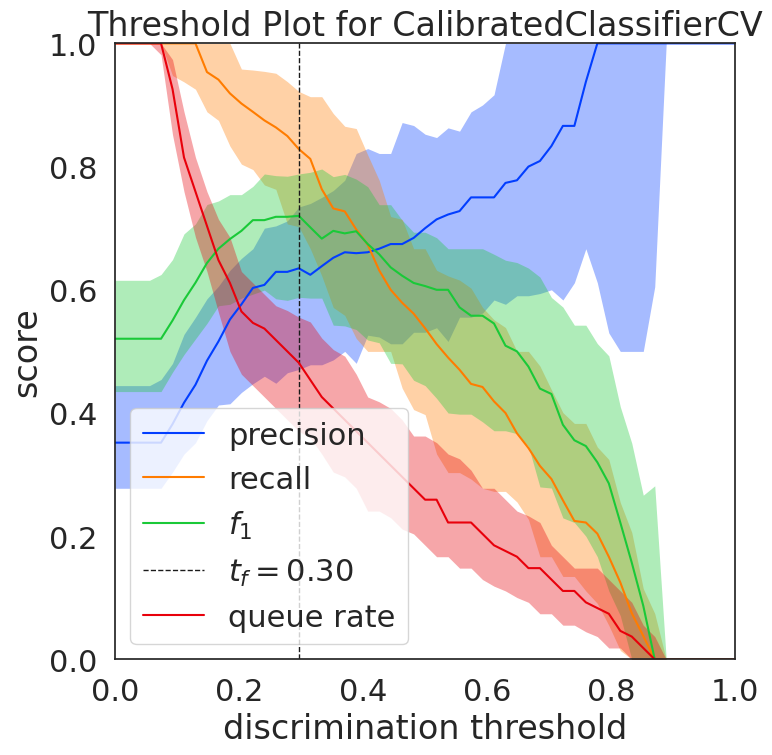

In [ ]:
plt.figure(figsize=(8, 8))
plot_model(final_model, plot='threshold')

La gráfica que se presenta es un Threshold Plot para un modelo de clasificación calibrado. Este tipo de gráfica se utiliza para visualizar cómo diferentes métricas de rendimiento varían en función de un umbral de decisión, que es el valor que el clasificador usa para determinar si una instancia pertenece a una clase o a otra.

**Precision (precisión, en azul)**: Mide cuántos de los ejemplos clasificados como positivos son verdaderamente positivos. Como se puede ver, la precisión tiende a aumentar a medida que el umbral de decisión es más alto, ya que se vuelven más estrictos los criterios para clasificar ejemplos como positivos.

**Recall (recuperación, en naranja)**: Mide cuántos de los ejemplos verdaderamente positivos son correctamente clasificados. La recuperación tiende a disminuir a medida que el umbral de decisión aumenta, porque menos ejemplos son clasificados como positivos.

**F1-score (en verde):** Es la media armónica entre la precisión y la recuperación, una métrica balanceada que toma en cuenta tanto los verdaderos positivos como los falsos positivos. Tiende a mantenerse en niveles intermedios y varía en función del umbral de decisión.

**Queue Rate (tasa de cola, en rojo):** Esta métrica evalúa cuántos ejemplos están siendo clasificados dentro de la clase positiva a medida que se ajusta el umbral.

**tf (threshold function):** La línea punteada que aparece en la gráfica corresponde a un umbral específico (en este caso, 0.30). Esto significa que el modelo está configurado para hacer predicciones con un umbral de 0.30 para decidir entre las clases. Este valor es ajustado dependiendo del objetivo, por ejemplo, si se prioriza la precisión o la recuperación.

En este gráfico, se observa que la precisión es alta a medida que aumenta el umbral de decisión, pero a costa de reducir la recuperación.
Un valor bajo de umbral tiende a mejorar la recuperación (recall), pero sacrifica la precisión, lo que significa que se clasificarían más instancias como positivas, aunque algunas de estas podrían ser incorrectas.
El equilibrio entre la precisión y la recuperación (F1-score) tiende a estar en un punto intermedio del umbral.

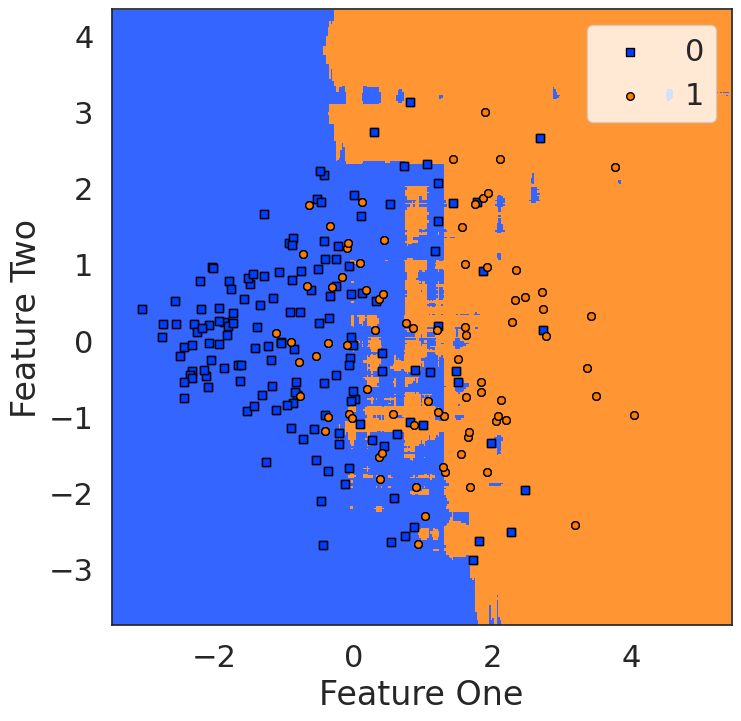

In [ ]:
plt.figure(figsize=(8, 8))
plot_model(final_model, plot='boundary')

# **Interpretación:**
**Colores:**
Azul: Representa la clase 0, que en este contexto podría ser la clase de pacientes no diagnosticados con diabetes.
Naranja: Representa la clase 1, que corresponde a pacientes diagnosticados con diabetes.

**Puntos: **
Los cuadrados negros representan las observaciones clasificadas como clase 0.
Los círculos naranjas representan las observaciones clasificadas como clase 1.

**Región del espacio:**
La gráfica está dividida en dos áreas principales, donde el área azul indica la región del espacio donde el modelo predice la clase 0, y el área naranja indica la región donde el modelo predice la clase 1.
Las fronteras entre las dos áreas muestran el límite de decisión del modelo, es decir, la zona donde el modelo cambia de predecir la clase 0 a la clase 1.

In [ ]:
#prediction
pred = final_model.predict(X_test)
#Accuracy
final_model = confusion_matrix( y_test, pred)
accuracy = accuracy_score(y_test , pred)
precision = precision_score(y_test , pred)
recall = recall_score(y_test , pred)
f1 = f1_score(y_test,pred)
print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
F1: {3:.4f}'.format(accuracy, precision, recall, f1))

accuracy: 0.9219, precision: 0.9355, recall: 0.8406,F1: 0.8855


# **Explicación de las métricas:**

**Exactitud (Accuracy):**
La exactitud es la proporción de predicciones correctas realizadas por el modelo. En este caso, es del 92.19%, lo que indica que el modelo ha clasificado correctamente el 92.19% de las observaciones en el conjunto de prueba.

**Precisión (Precision):**
La precisión mide cuántas de las instancias predichas como positivas (en este caso, pacientes con diabetes) son realmente positivas. El valor es 0.9355 (93.55%), lo que significa que de todos los casos que el modelo predijo como positivos, el 93.55% son verdaderamente positivos.

**Sensibilidad o Recall (Recall):**
La sensibilidad mide la capacidad del modelo para identificar correctamente las instancias positivas. Es del 0.8406 (84.06%), lo que indica que el modelo identificó correctamente el 84.06% de todos los casos verdaderamente positivos en el conjunto de prueba.

**Puntaje F1 (F1 Score):**
El puntaje F1 es la media armónica entre la precisión y la sensibilidad, proporcionando una métrica más equilibrada que toma en cuenta tanto los falsos positivos como los falsos negativos. En este caso, el puntaje F1 es 0.8855 (88.55%), lo que indica un buen equilibrio entre precisión y sensibilidad.

***Interpretación general:***
El modelo tiene un rendimiento sólido, con una alta precisión y exactitud en las predicciones. El puntaje F1 muestra que el modelo mantiene un buen equilibrio entre identificar correctamente los positivos y evitar los falsos positivos.

Text(0.5, 1.0, 'Confusion Matrix (final_model)')

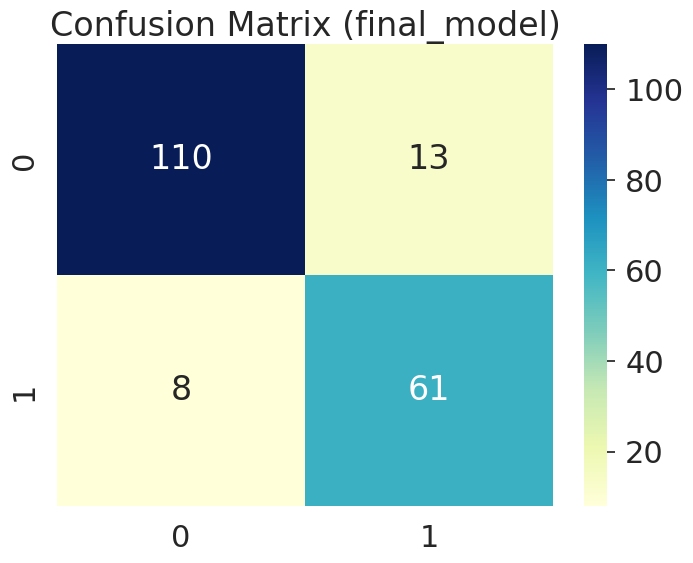

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(confusion_hard, cmap = 'YlGnBu',annot = True, fmt='d')
ax.set_title('Confusion Matrix (final_model)')

**Interpretación:**

El modelo predice correctamente 110 casos no diabéticos y 61 casos diabéticos.

Sin embargo, comete 13 errores al predecir como diabéticos a personas que no lo son (falsos positivos).

También falla en 8 ocasiones al predecir como no diabéticos a personas que realmente son diabéticas (falsos negativos).

Este balance entre verdaderos y falsos positivos/negativos ayuda a entender la capacidad del modelo para diferenciar entre clases y puede dar una indicación del rendimiento general del modelo (medido con métricas como precisión, recall, F1, etc.).


**CONCLUSIONES**

# **1. Importancia del modelo Ensemble:**
Los Ensemble Models son fundamentales en la mejora del rendimiento predictivo en problemas de clasificación complejos. Este enfoque combina varios modelos individuales (como árboles de decisión, regresiones, y otros clasificadores) para crear un modelo más robusto. En el contexto de la predicción de la diabetes, esta técnica permite mitigar los errores que puede tener un modelo individual, aumentando la precisión y la capacidad de generalización del modelo.

Los modelos Ensemble suelen lograr mejores resultados debido a su capacidad para aprovechar las fortalezas de diferentes clasificadores, compensando las debilidades de otros.
Soft voting y hard voting fueron aplicados para aumentar la exactitud de las predicciones al combinar las probabilidades o predicciones de varios modelos base.

# **2. Por qué se aplicó Ensemble Models en la predicción de diabetes:**
En la predicción de la diabetes, las características o variables disponibles presentan un reto debido a que algunas no tienen una fuerte correlación con el resultado (Outcome). Sin embargo, otras como Glucose y BMI mostraron una mayor correlación positiva, lo que sugiere su importancia en la clasificación. Usar un solo modelo como la regresión logística podría no capturar bien la complejidad de la relación entre las variables de entrada y el resultado.

Ensemble Models se aplicó para:

Mejorar el rendimiento predictivo, combinando la fortaleza de varios algoritmos.
Reducir el riesgo de overfitting y mejorar la capacidad del modelo para generalizar a nuevos datos.
Proporcionar robustez ante las características con distribuciones complicadas, como aquellas que presentan valores de cero (como Insulin).

# **3. Variables clave utilizadas:**
Las variables seleccionadas en este conjunto de datos de predicción de diabetes fueron:

Pregnancies: Número de embarazos.
Glucose: Nivel de glucosa en la sangre.
BloodPressure: Presión sanguínea diastólica.
SkinThickness: Grosor del pliegue cutáneo.
Insulin: Cantidad de insulina en el cuerpo.
BMI: Índice de masa corporal.
DiabetesPedigreeFunction (DPF): Función de pedigrí de diabetes.
Age: Edad del paciente.
Estas características se utilizaron como variables independientes para predecir si una persona tiene diabetes o no (Outcome, la variable dependiente).

# **4. Evaluación y predicción:**
A lo largo del proceso, el rendimiento de varios modelos se comparó utilizando métricas como precisión, recall, F1 score y AUC (Área bajo la curva ROC).

El modelo de Stacking mostró que el conjunto de modelos puede mejorar la capacidad predictiva en comparación con modelos individuales.

Al final, después de aplicar soft y hard voting, el modelo de soft voting tuvo una AUC de 0.95, lo que indica una excelente capacidad para distinguir entre personas diabéticas y no diabéticas.

Los resultados de la matriz de confusión del modelo final indicaron una alta precisión (93%) y un recall sólido (84%), lo que significa que el modelo tiene una buena capacidad para identificar correctamente tanto los casos positivos como los negativos.

# **5. Modelo final:**
Después de afinar el modelo y calibrar las probabilidades con la técnica Soft Voting, el modelo final logró una predicción precisa y balanceada. Algunas conclusiones del modelo final:

El modelo final alcanzó una precisión de 92%, un recall de 84% y un F1 Score de 88%, lo que demuestra su capacidad para hacer predicciones precisas en este problema de clasificación.
La calibración del modelo permitió afinar aún más las predicciones, ajustando los umbrales de clasificación y mejorando las predicciones probabilísticas.


El uso de Ensemble Models en la predicción de la diabetes mostró ser una estrategia altamente eficaz. Las combinaciones de modelos permitieron capturar mejor la relación no lineal entre las características del paciente y el resultado de la diabetes, logrando métricas de rendimiento mucho más robustas que las obtenidas con modelos individuales.

El proceso incluyó la selección de las variables más importantes, la evaluación y ajuste de los hiperparámetros, y la creación de un modelo final con stacking y voting, optimizando así la precisión y el rendimiento del sistema.